<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## Logistic Regression Case Study on Lead Scoring - DS68 Batch

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified as leads. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X Education is around 30%.

Although X Education generates a lot of leads, its lead conversion rate is very poor. For example, if they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads**, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should increase as the sales team will focus more on communicating with potential leads rather than making calls to everyone.

A typical lead conversion process can be represented using a funnel:

![Lead Conversion Process](https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg)

X Education has appointed us to help them select the most promising leads, i.e., those that are most likely to convert into paying customers. The company requires us to build a model that assigns a lead score to each of the leads such that customers with higher lead scores have a higher conversion chance and customers with lower lead scores have a lower conversion chance. **The CEO has given a target lead conversion rate of around 80%.**

### Data

We have been provided with a leads dataset from the past containing approximately 9,000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc., which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable is the column ‘Converted’, indicating whether a past lead was converted (1) or not (0).

It is important for us to check for levels present in categorical variables. Many categorical variables have a level called 'Select', which needs to be handled as it is equivalent to a null value.

### Goals and Objectives

There are several goals for this case study:

- **Build a logistic regression model** to assign a lead score between 0 and 100 to each of the leads. A higher score would mean that the lead is hot (most likely to convert), whereas a lower score would mean that the lead is cold (unlikely to convert).

- Address additional problems presented by the company which our model should be able to adapt to if requirements change in the future. These problems are provided in a separate document file. We will make sure to include this in our final presentation where we will make recommendations.

*___Throughout this report, we present **Important Outcomes** and **Insights** in Notes (from **Note 1** to **Note 24**).

# Step 1: Importing Essential Libraries and Modules

In [13]:
# Import and Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

# Import Essential Libraries for Data Analysis, Visualization, and Statistical Modeling
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as ss
import tabulate as tbl
from tabulate import tabulate

# Set pandas display options to show more rows and columns for better visibility during analysis
pd.set_option("display.max_rows", 500)
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_columns', None)


# Configure Matplotlib for inline plotting in Jupyter Notebook
%matplotlib inline

# Set Seaborn theme and enable color codes for plotting aesthetics
sns.set_theme()

# Libraries for Statistical Modeling and Machine Learning
import statsmodels.api as sm  # For statistical modeling
import sklearn  # For machine learning 
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating Variance Inflation Factor (VIF)

# Libraries for Data Preprocessing and Feature Engineering
from sklearn.preprocessing import RobustScaler # For feature scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # For encoding categorical variables and feature scaling
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.compose import ColumnTransformer  # For applying transformations to specific columns in a DataFrame
from sklearn.pipeline import Pipeline  # For creating a streamlined workflow

# Libraries for Model Selection and Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # For splitting data and hyperparameter tuning using grid search
from sklearn.linear_model import LogisticRegression  # For logistic regression modeling
from sklearn.feature_selection import RFE  # For recursive feature elimination
from sklearn import metrics  # For model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, ConfusionMatrixDisplay  # For model evaluation metrics

# Libraries for Dimensionality Reduction
from sklearn.decomposition import PCA, IncrementalPCA  # For principal component analysis techniques

# Libraries for Statistical Analysis
from scipy.stats import skew, kurtosis  # For calculating skewness and kurtosis of distributions

In [14]:
# Display the versions of Libraries in this report.
## ANSI escape codes for bold text
BOLD = '\033[1m'
RESET = '\033[0m'
print(BOLD +'Versions of Key Libraries and Modules Used in This Report:'+RESET)
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', mpl.__version__)
print('Seaborn version:', sns.__version__)  
print('Scipy version:', sp.__version__)
print('Tabulate version:', tbl.__version__)
print('statsmodels.api version:', sm.__version__)
print('Scikit-learn version:', sklearn.__version__)

Versions of Key Libraries and Modules Used in This Report:
Numpy version: 1.26.4
Pandas version: 2.1.4
Matplotlib version: 3.9.2
Seaborn version: 0.13.1
Scipy version: 1.14.1
Tabulate version: 0.9.0
statsmodels.api version: 0.14.2
Scikit-learn version: 1.5.1


# Step 2: Data Acquisition and Preparation

## 2.1. Read in and Inspect the Dataset

In [15]:
# Load the data by Pandas.
df = pd.read_csv('Leads.csv', encoding='utf-8')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [16]:
# Print the shape of df dataset 
print(f'The shape of the dataset is: {df.shape}')
row_initial = df.shape[0] # Initial number of rows in the dataset

The shape of the dataset is: (9240, 37)


In [17]:
# Print the info of df dataset  
print('Dataset information:')
print(df.info(verbose=True))

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit           

In [18]:
# Print all the columns of the df dataset
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
# Describe for Numerical Variables of the df dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [20]:
# Calculate the Conversion rate (%) based on the 'Converted' column of the initial df dataset
conversion_rate_initial = (df['Converted'].sum() / len(df)) * 100  
print(f"Conversion Rate (%) at the beginning: {round(conversion_rate_initial, 2)}%")  

Conversion Rate (%) at the beginning: 38.54%


## Note 1: Preliminary Observations

- The dataset comprises **9,240 rows** and **37 columns**.
- Several categorical variables necessitate the creation of dummy variables for analysis.
- A significant number of null values are present, which will require appropriate handling to ensure data integrity.
- The initial conversion rate is: 38.54%

## 2.2. Data Cleaning 

In [21]:
# Print the missing values of columns of the df dataset
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [22]:
# Create def for checking the missing values the df dataset
def check_missing_values(df):
    
    ## Calculate the missing values for each column in the dataframe
    missing_values = df.isnull().sum()
    # Calculate the percentage of missing values for each column
    missing_percentage = (missing_values / len(df)) * 100
    
    # Determine the data type for each column (numerical or categorical)
    data_types = df.dtypes.apply(lambda x: 'Numerical' if pd.api.types.is_numeric_dtype(x) else 'Categorical')
    
    # Create a DataFrame to display the missing values, their percentages, and data types
    missing_data = pd.DataFrame({
        'Column Name': df.columns,
        'Missing Values': missing_values.values,
        'Percentage Missing (%)': missing_percentage.round(2),  # Round to 2 decimal places
        'Data Type': data_types.values
    })
    
    # Sort the DataFrame by the number of missing values in descending order
    missing_data_sorted = missing_data.sort_values(by='Missing Values', ascending=False)
    
    # Display the resulting DataFrame with missing values information
    print(missing_data_sorted.to_string(index=False))
    
    # Count the number of numerical and categorical variables with missing data
    numerical_missing_count = (data_types == 'Numerical') & (missing_values > 0)
    categorical_missing_count = (data_types == 'Categorical') & (missing_values > 0)
    
    num_numerical_missing = numerical_missing_count.sum()
    num_categorical_missing = categorical_missing_count.sum()
    
    # Print counts of numerical and categorical variables with missing data
    print(f"\nNumber of numerical variables with missing data: {num_numerical_missing}")
    print(f"Number of categorical variables with missing data: {num_categorical_missing}")

In [23]:
# Check the missing values the df dataset
print("Missing Values in the current df dataset:")
check_missing_values(df)

Missing Values in the current df dataset:
                                  Column Name  Missing Values  Percentage Missing (%)   Data Type
                                 Lead Quality            4767                   51.59 Categorical
                  Asymmetrique Activity Index            4218                   45.65 Categorical
                   Asymmetrique Profile Score            4218                   45.65   Numerical
                  Asymmetrique Activity Score            4218                   45.65   Numerical
                   Asymmetrique Profile Index            4218                   45.65 Categorical
                                         Tags            3353                   36.29 Categorical
                                 Lead Profile            2709                   29.32 Categorical
What matters most to you in choosing a course            2709                   29.32 Categorical
              What is your current occupation            2690               

In [24]:
# Display the value counts for each column in the df dataset in ascending order of unique values
sorted_columns = df.nunique().sort_values(ascending=True).index
for col_name in sorted_columns:
    print(f'Value counts for column: {col_name}')
    value_counts = df[col_name].astype('category').value_counts(dropna=False)  # Include NaN counts
    print(value_counts)
    print('-' * 30)

Value counts for column: Get updates on DM Content
Get updates on DM Content
No    9240
Name: count, dtype: int64
------------------------------
Value counts for column: I agree to pay the amount through cheque
I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64
------------------------------
Value counts for column: Receive More Updates About Our Courses
Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64
------------------------------
Value counts for column: Magazine
Magazine
No    9240
Name: count, dtype: int64
------------------------------
Value counts for column: Update me on Supply Chain Content
Update me on Supply Chain Content
No    9240
Name: count, dtype: int64
------------------------------
Value counts for column: Through Recommendations
Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64
------------------------------
Value counts for column: Digital Advertisement
Digital Advertisement
No     9236
Ye

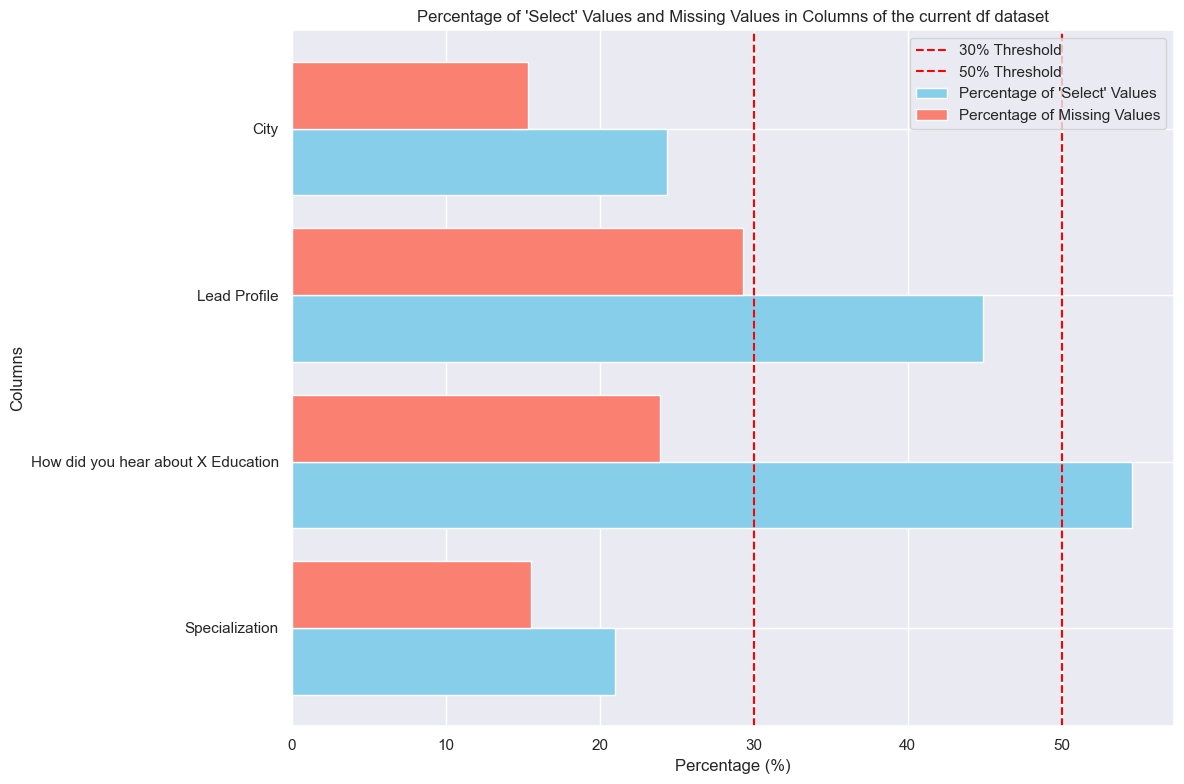

In [25]:
# Check for columns with Missing values and 'Select' values- which basically means that the student had not selected the option for that particular column

## Identify columns with 'Select' values
select_columns = [col for col in df.columns if 'Select' in df[col].unique()]

## Calculate percentage of 'Select' values in those columns
select_percentages = {}
for col in select_columns:
    select_count = (df[col] == 'Select').sum()
    total_count = len(df[col])
    select_percentage = (select_count / total_count) * 100
    select_percentages[col] = select_percentage

## Calculate percentage of missing values in those columns
missing_percentages = {}
for col in select_columns:
    missing_count = df[col].isnull().sum()
    total_count = len(df[col])
    missing_percentage = (missing_count / total_count) * 100
    missing_percentages[col] = missing_percentage

## Convert to DataFrame for easier plotting
select_df = pd.DataFrame(list(select_percentages.items()), columns=['Column', 'Select Percentage'])
missing_df = pd.DataFrame(list(missing_percentages.items()), columns=['Column', 'Missing Percentage'])

## Merge both DataFrames on 'Column'
combined_df = pd.merge(select_df, missing_df, on='Column')

## Visualize the results horizontally
plt.figure(figsize=(12, 8))
bar_width = 0.4
index = range(len(combined_df))

## Create horizontal bars for Select Percentage
plt.barh(index, combined_df['Select Percentage'], bar_width, label="Percentage of 'Select' Values", color='skyblue')

## Create horizontal bars for Missing Percentage, offset by bar width
plt.barh([i + bar_width for i in index], combined_df['Missing Percentage'], bar_width, label='Percentage of Missing Values', color='salmon')

plt.ylabel('Columns')
plt.xlabel('Percentage (%)')
plt.title(f"Percentage of 'Select' Values and Missing Values in Columns of the current df dataset")
plt.yticks([i + bar_width / 2 for i in index], combined_df['Column'])
plt.axvline(x=30, color='red', linestyle='--', label='30% Threshold')  # Optional threshold line
plt.axvline(x=50, color='red', linestyle='--', label='50% Threshold')  # Optional threshold line
plt.legend()
plt.tight_layout()
plt.show()

#### Note 2: Remarks on Data Cleaning and Analysis
- The analysis of the dataset reveals important insights regarding user selections and consent. Notably, the presence of the value **"Select"** in **four columns** suggests that the students did not make a selection, which can be interpreted as **missing values**. Therefore, **replacing "Select" with NaN**, except for the `Specialization` column before the first dropping- because it is an important feature in our analysis, is a reasonable approach as it cleans the data for subsequent analysis.

- Furthermore, the columns **'Do Not Email'** and **'Do Not Call'** warrant further examination to better understand customer consent. If a significant number of users select **"No,"** this may indicate a need to reevaluate marketing strategies.

- Additionally, we have identified that the variables **'City,' 'Country,' 'Prospect ID,'** and **'Lead Number'** do not contribute meaningfully to our analysis. Consequently, we have decided to exclude these variables from our dataset to enhance the focus and clarity of our analysis.

- This approach ensures that our dataset is streamlined and relevant for deriving actionable insights.

In [26]:
# Drop the 'City', 'Country', 'Prospect ID', and 'Lead Number' columns from the df dataset
df = df.drop(['City', 'Country', 'Prospect ID', 'Lead Number'], axis=1)
print(f'The shape of the df dataset now is: {df.shape}')

The shape of the df dataset now is: (9240, 33)


In [27]:
# Replacing 'Select' value in all columns except 'Specialization' with NaN
df = df.apply(lambda x: x.replace('Select', np.nan) if x.name != 'Specialization' else x)
print(f'The shape of the df dataset now is: {df.shape}')

The shape of the df dataset now is: (9240, 33)


In [28]:
# Check the missing values the df dataset
print("Missing Values in the current df dataset:")
check_missing_values(df)

Missing Values in the current df dataset:
                                  Column Name  Missing Values  Percentage Missing (%)   Data Type
           How did you hear about X Education            7250                   78.46 Categorical
                                 Lead Profile            6855                   74.19 Categorical
                                 Lead Quality            4767                   51.59 Categorical
                  Asymmetrique Activity Score            4218                   45.65   Numerical
                   Asymmetrique Profile Score            4218                   45.65   Numerical
                   Asymmetrique Profile Index            4218                   45.65 Categorical
                  Asymmetrique Activity Index            4218                   45.65 Categorical
                                         Tags            3353                   36.29 Categorical
What matters most to you in choosing a course            2709               

#### Note 3: Missing values of the current df dataset
- When dealing with missing values in a dataset, it's crucial to evaluate the extent and implications of the missing data before deciding on a course of action.
- In our dataset, several columns exhibit significant percentages of missing values, with some exceeding 50%.
- So we ***decide to drop columns with a high percentage at the threshold of `35% missing values`***, 

In [29]:
# Drop columns with > 35% of missing values from the df dataset
missing_percentage = (df.isnull().sum() / len(df)) * 100
high_missing_cols = missing_percentage[missing_percentage > 35].index
print(f'Dropped columns with > 35% missing values: {high_missing_cols.values}')
df.drop(high_missing_cols, axis=1, inplace=True)
print(f'The shape of the df dataset now is: {df.shape}')

Dropped columns with > 35% missing values: ['How did you hear about X Education' 'Tags' 'Lead Quality' 'Lead Profile'
 'Asymmetrique Activity Index' 'Asymmetrique Profile Index'
 'Asymmetrique Activity Score' 'Asymmetrique Profile Score']
The shape of the df dataset now is: (9240, 25)


In [30]:
# Check the missing values the updated df dataset
print("Missing Values in the updated df dataset:")
check_missing_values(df)

Missing Values in the updated df dataset:
                                  Column Name  Missing Values  Percentage Missing (%)   Data Type
What matters most to you in choosing a course            2709                   29.32 Categorical
              What is your current occupation            2690                   29.11 Categorical
                               Specialization            1438                   15.56 Categorical
                                  TotalVisits             137                    1.48   Numerical
                         Page Views Per Visit             137                    1.48   Numerical
                                Last Activity             103                    1.11 Categorical
                                  Lead Source              36                    0.39 Categorical
                                  Lead Origin               0                    0.00 Categorical
                                    Newspaper               0               

In [31]:
# Identify and drop non-informative columns (those with only one unique value) so that they can be removed from the df dataset
unique_counts= df.nunique().sort_values(ascending=True)
print('Number of unique values in each column of the dataset: \n', unique_counts)
print('=' * 100)
single_value_columns = unique_counts[unique_counts == 1].index
print(f'Dropped columns with only one unique value: {single_value_columns.values}')
print('=' * 100)
df.drop(single_value_columns, axis=1, inplace=True)
print(f'The shape of the df dataset now is: {df.shape}')

Number of unique values in each column of the dataset: 
 I agree to pay the amount through cheque            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Receive More Updates About Our Courses              1
Magazine                                            1
Search                                              2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
A free copy of Mastering The Interview              2
Newspaper Article                                   2
X Education Forums                                  2
What matters most to you in choosing a course       3
Lead Origin                                         5
What is your current occu

In [32]:
# Check the missing values the updated df dataset
print("Missing Values in the updated df dataset:")
check_missing_values(df)

Missing Values in the updated df dataset:
                                  Column Name  Missing Values  Percentage Missing (%)   Data Type
What matters most to you in choosing a course            2709                   29.32 Categorical
              What is your current occupation            2690                   29.11 Categorical
                               Specialization            1438                   15.56 Categorical
                                  TotalVisits             137                    1.48   Numerical
                         Page Views Per Visit             137                    1.48   Numerical
                                Last Activity             103                    1.11 Categorical
                                  Lead Source              36                    0.39 Categorical
                            Newspaper Article               0                    0.00 Categorical
       A free copy of Mastering The Interview               0               

In [33]:
# Display the first five rows of the updated df dataset
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified



Visualizing Categorical Variables of the current df dataset sorted by unique values:


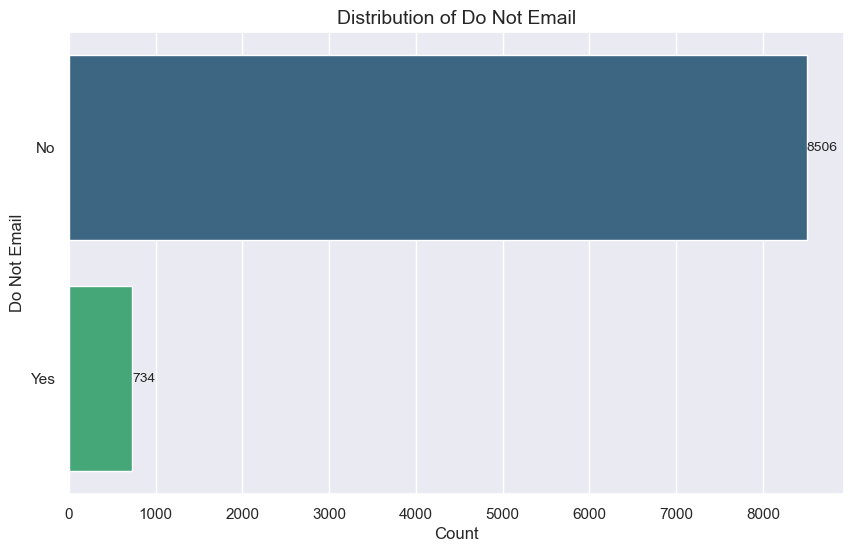

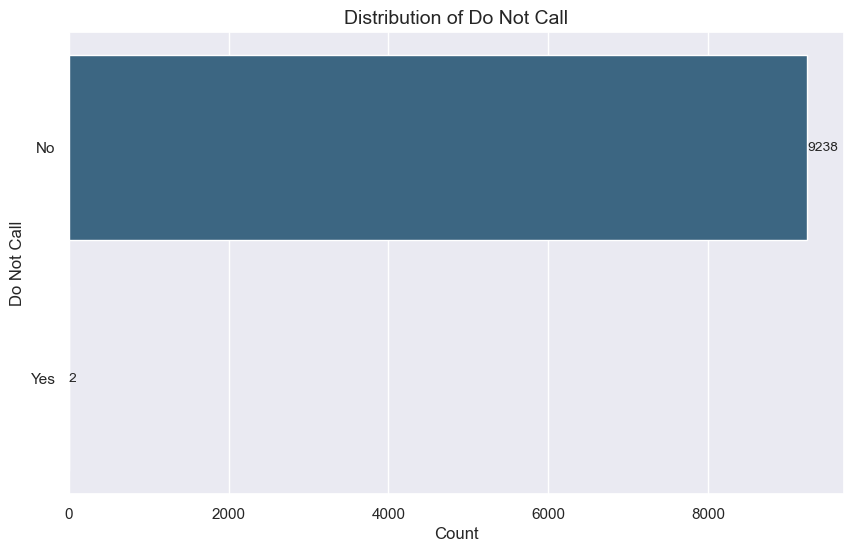

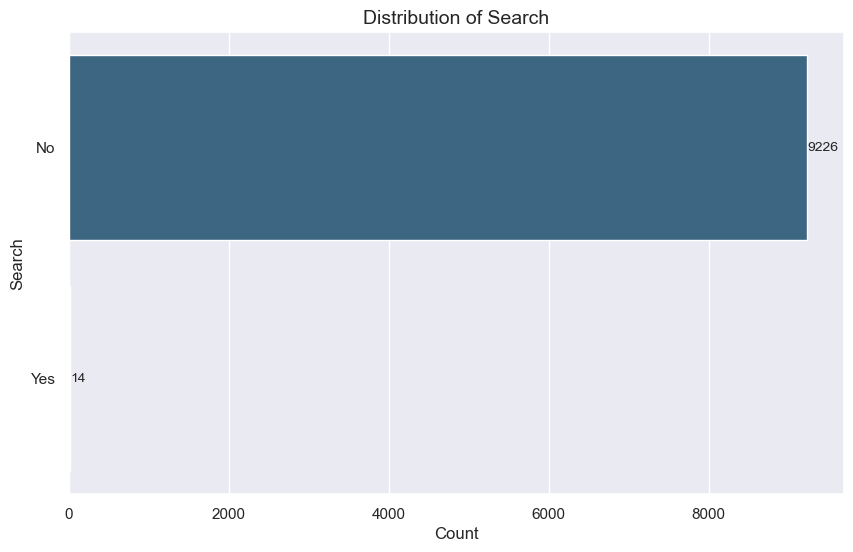

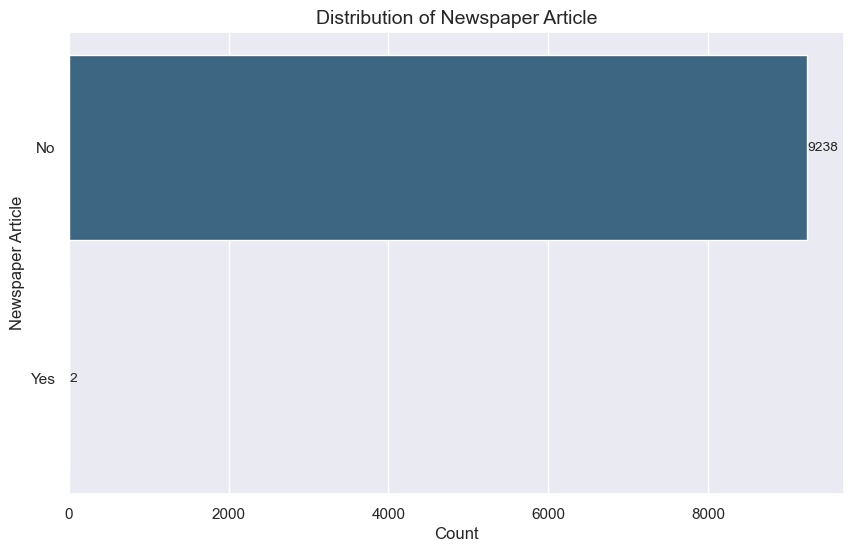

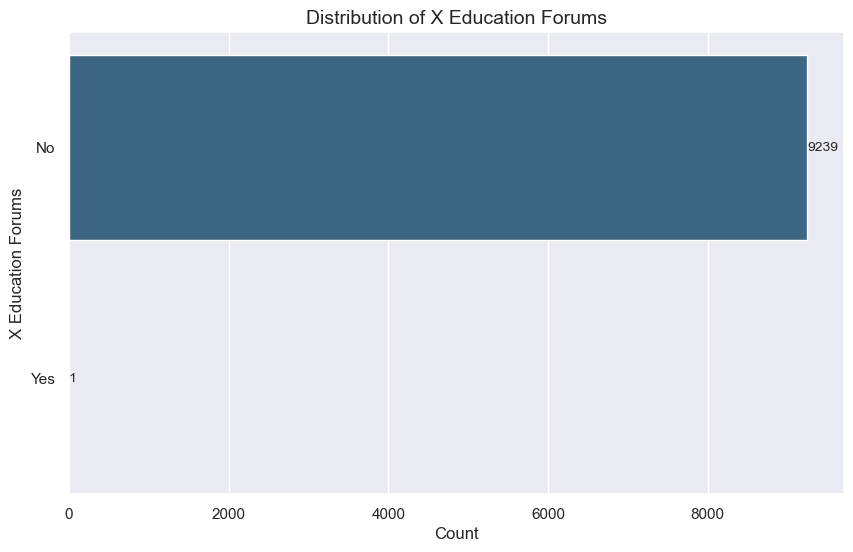

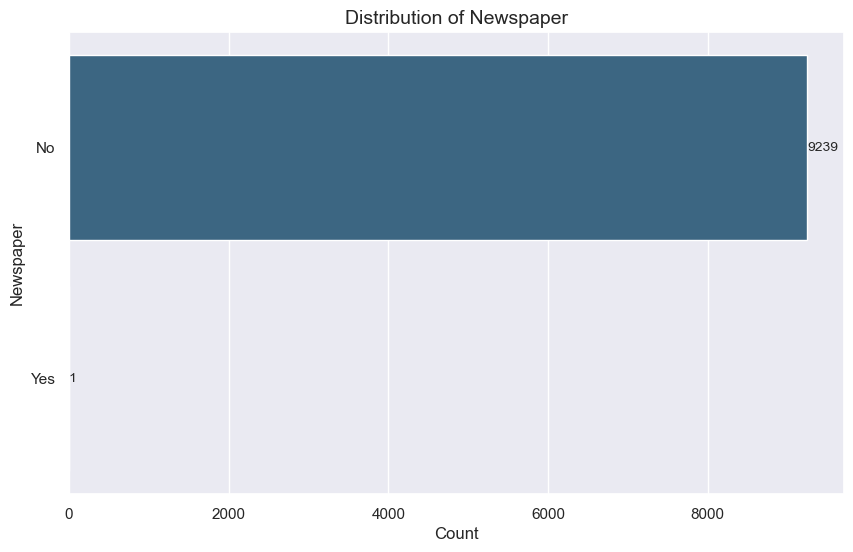

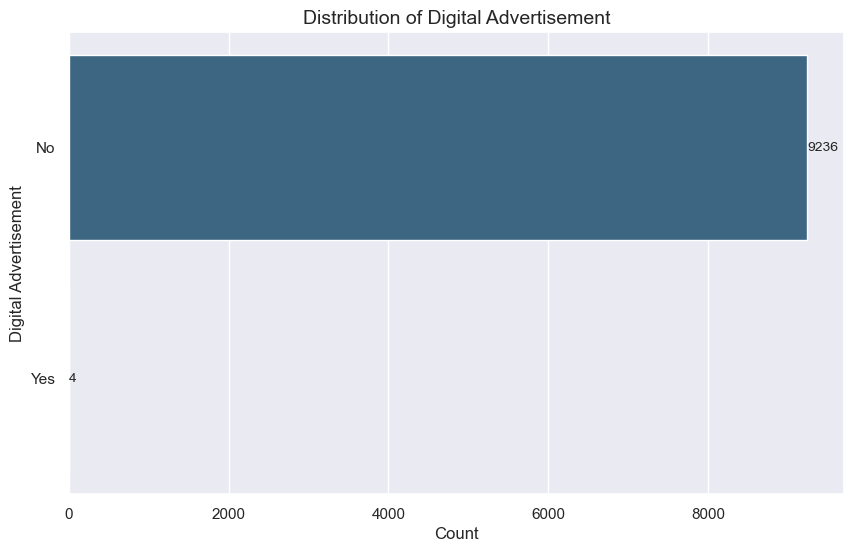

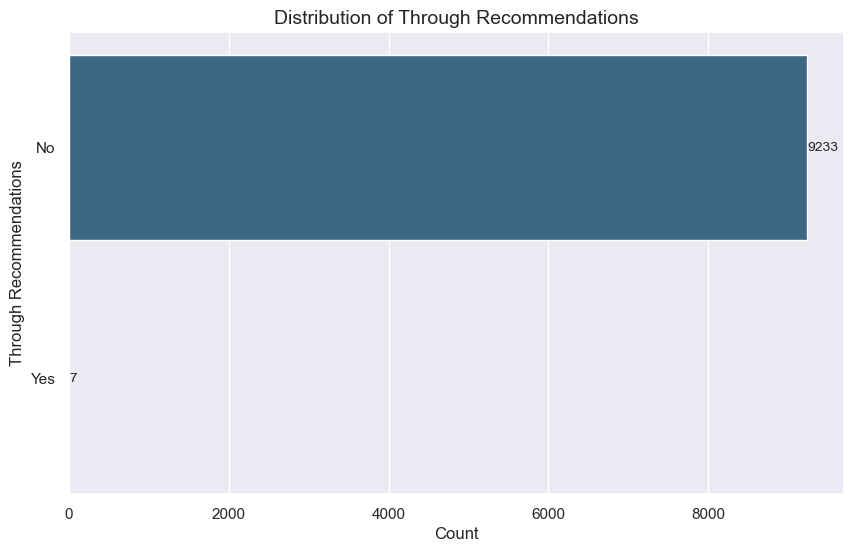

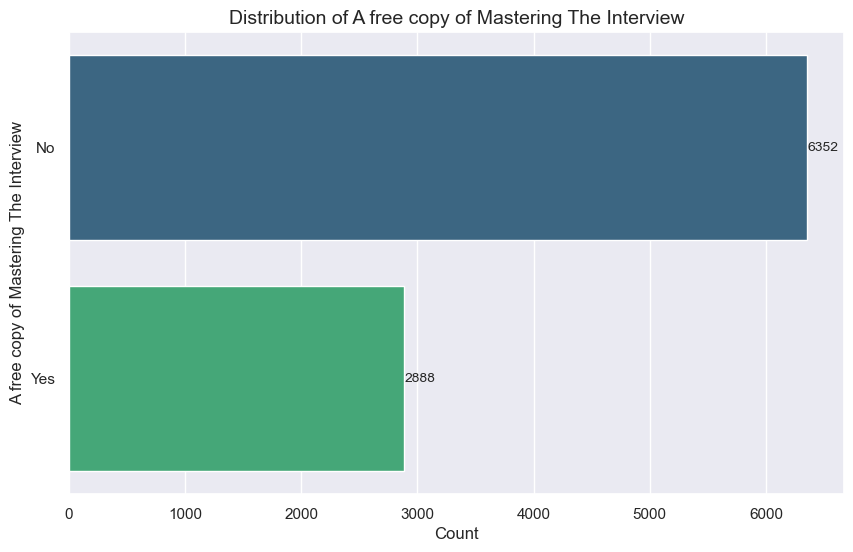

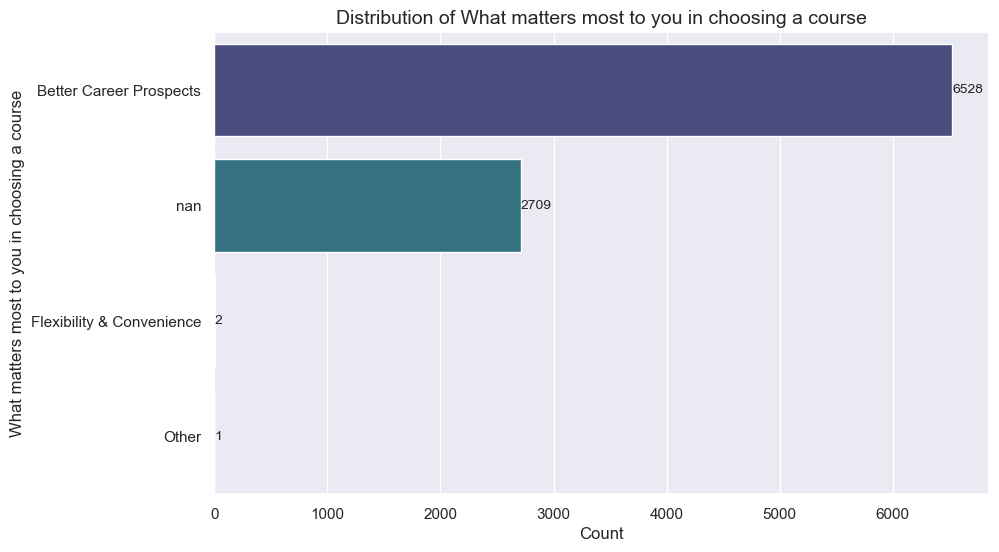

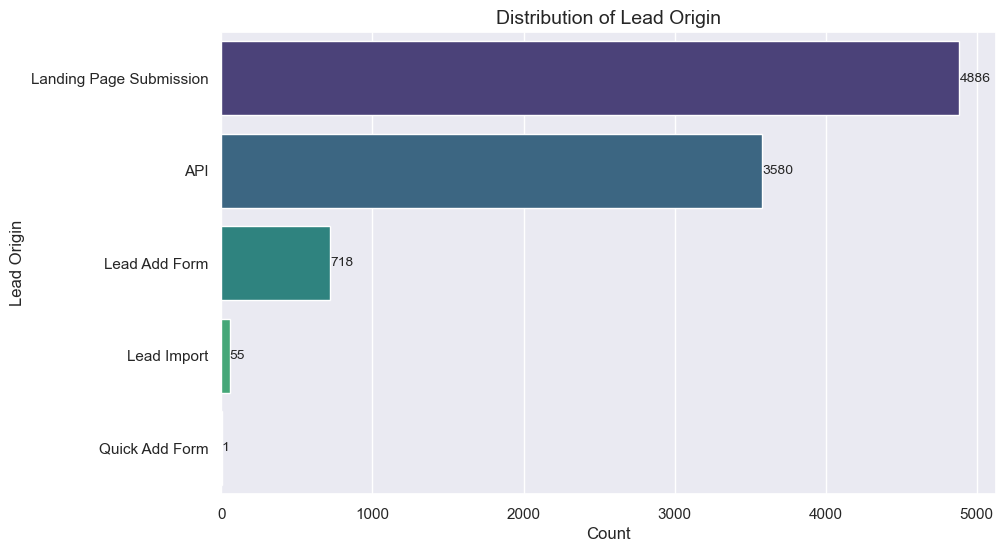

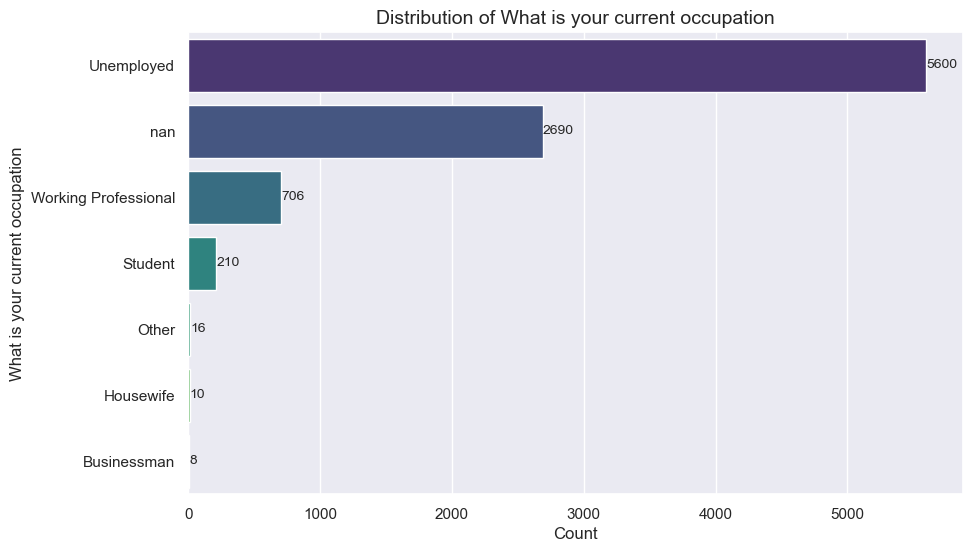

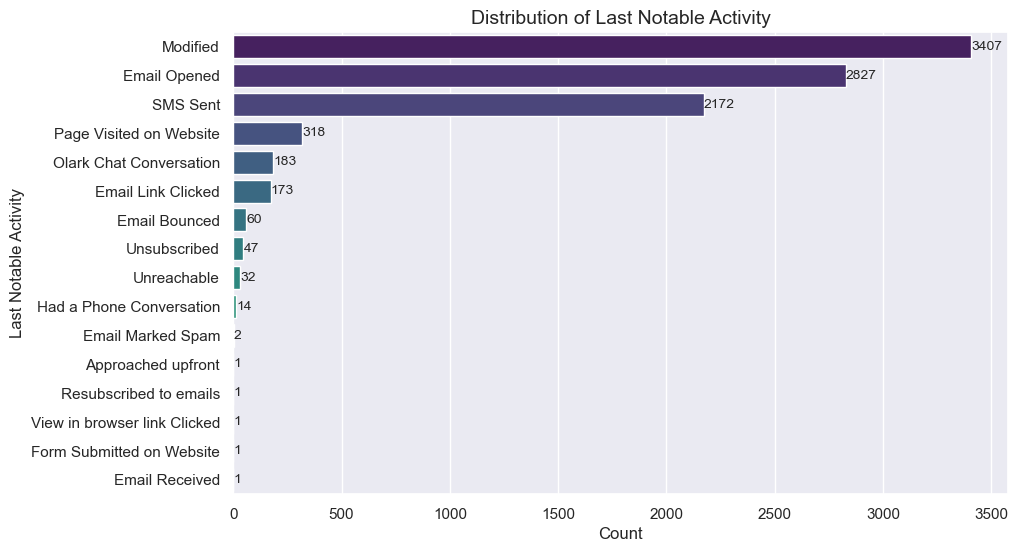

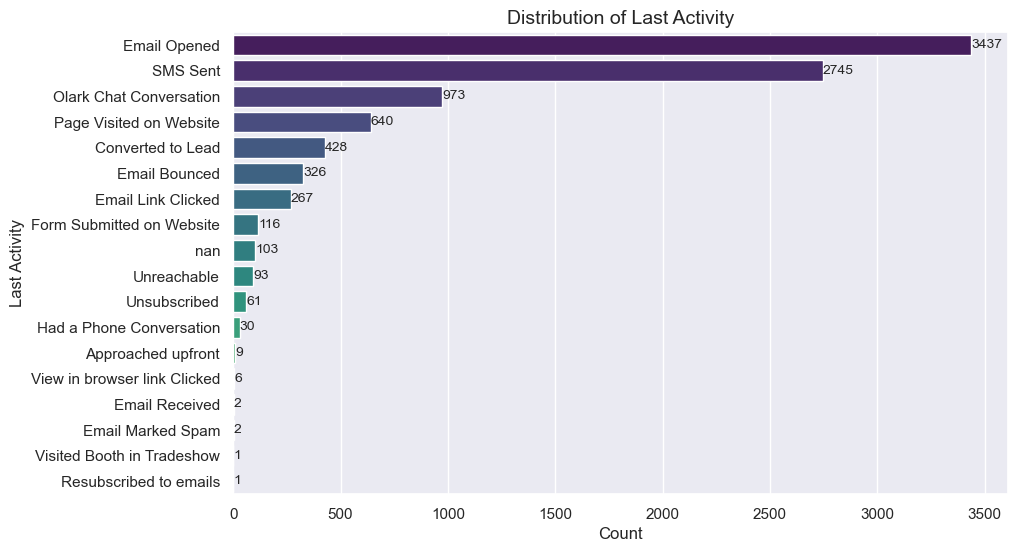

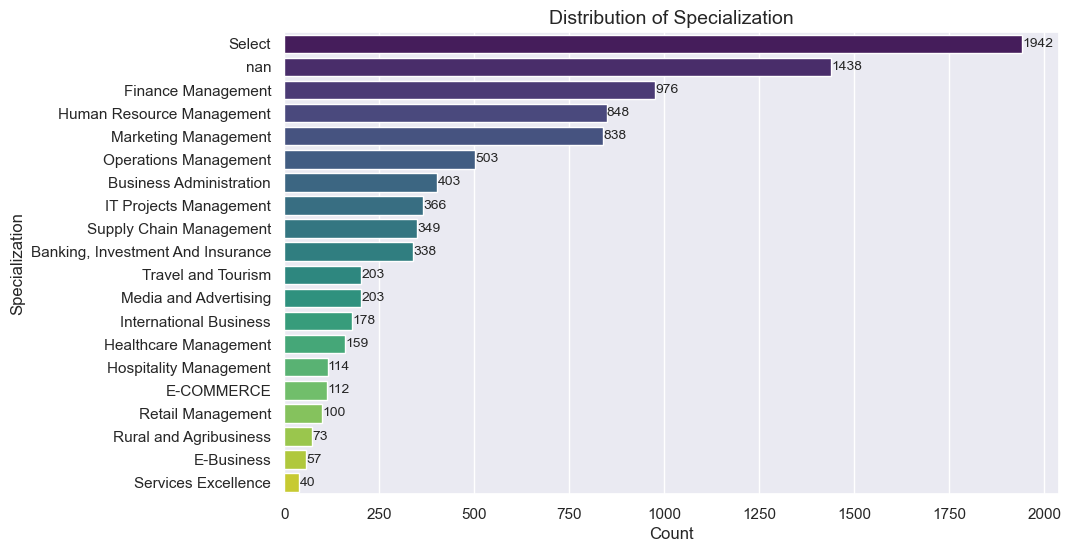

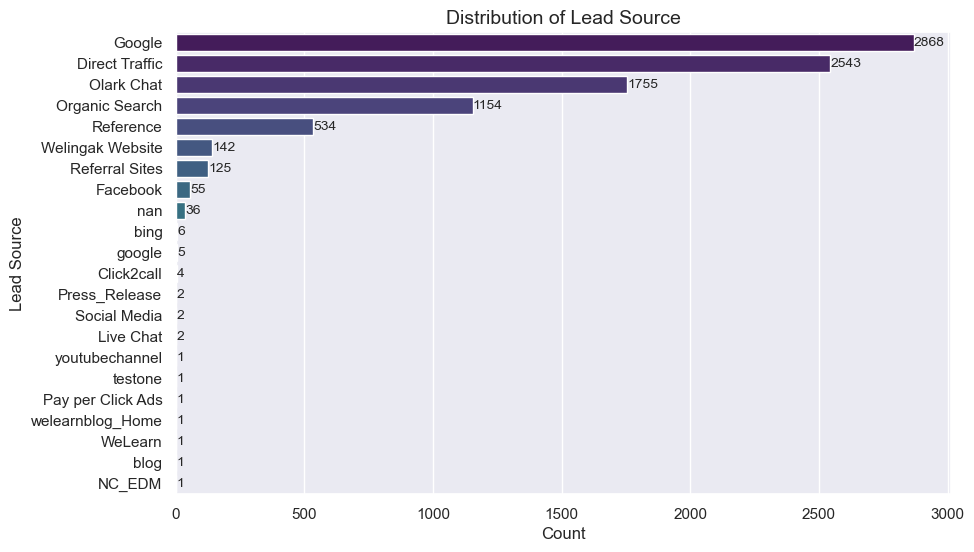

----------------------------------------------------------------------------------------------------

Visualizing Numerical Variables of the current df dataset sorted by unique values:


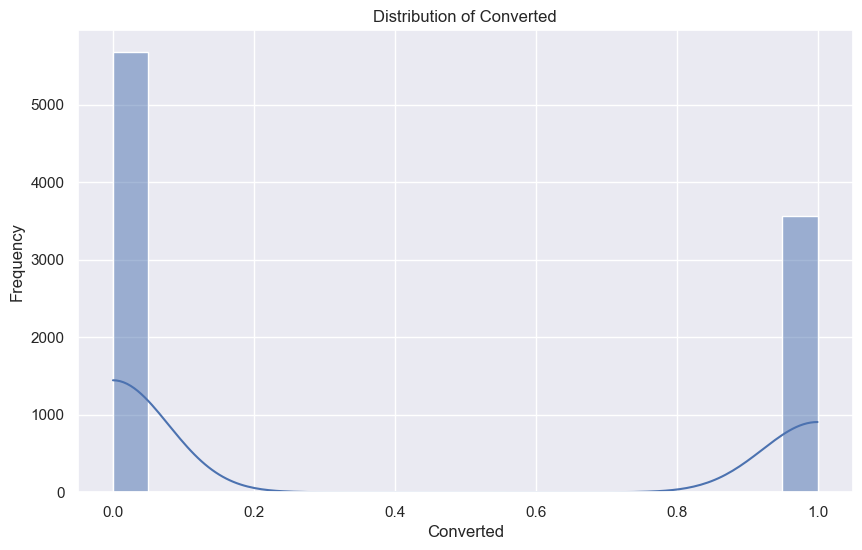

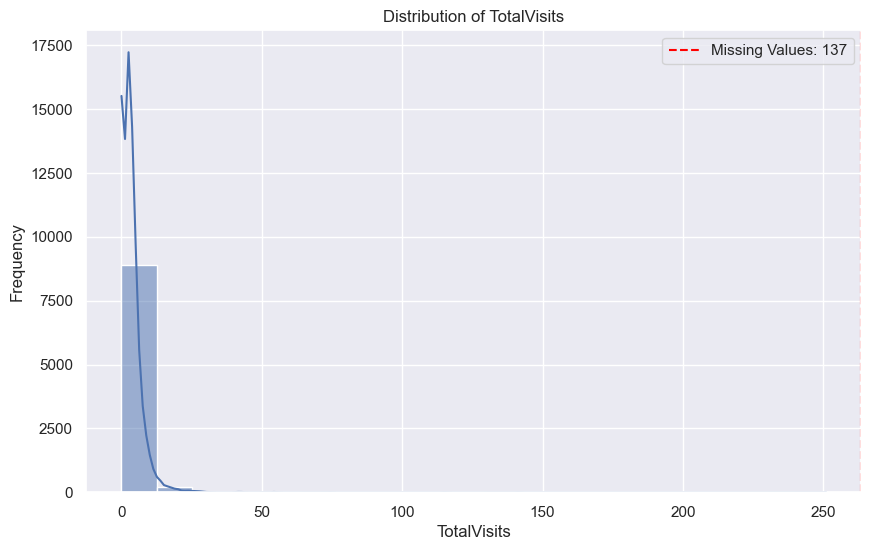

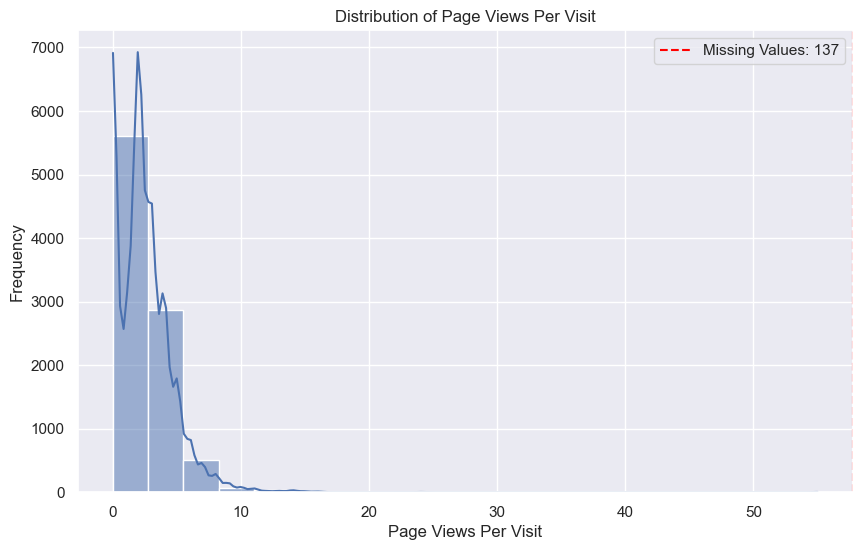

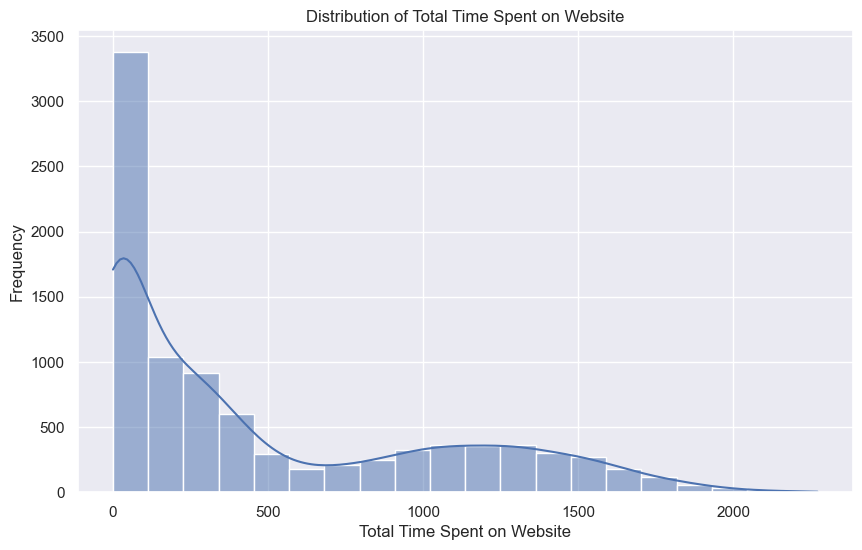

In [34]:
# Visual the distributions, including missing value (NaN) of Columns of the current df dataset (Categorical and Numerical types)
## Classify columns into Categorical or Numerical
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

## Function to plot Categorical Variables with missing values
def plot_categorical_distribution(dataframe, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        
        # Create a new dataframe for plotting, including missing values
        data_counts = dataframe[column].value_counts(dropna=False)
        data_counts.index = data_counts.index.astype(str)  # Convert index to string for plotting
        
        ax = sns.barplot(y=data_counts.index, x=data_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}', fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(column, fontsize=12)

        # Add value counts to the right of each bar with smaller text
        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', 
                        (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                        ha='left', va='center', fontsize=10)

        plt.show()

## Function to plot Numerical Variables with missing values
def plot_numerical_distribution(dataframe, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        
        # Plot histogram for numerical data
        sns.histplot(dataframe[column].dropna(), bins=20, kde=True)
        
        # Add vertical line for missing values
        num_missing = dataframe[column].isnull().sum()
        if num_missing > 0:
            plt.axvline(x=dataframe[column].max() + (dataframe[column].max() - dataframe[column].min()) * 0.05,
                        color='red', linestyle='--', label=f'Missing Values: {num_missing}')
            plt.legend()

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


## Visualize Categorical columns sorted by unique values
if categorical_columns:
    print("\nVisualizing Categorical Variables of the current df dataset sorted by unique values:")
    sorted_categorical_columns = sorted(categorical_columns, key=lambda col: df[col].nunique())
    plot_categorical_distribution(df, sorted_categorical_columns)

print('-'*100)

## Visualize Numerical columns sorted by unique values
if numerical_columns:
    print("\nVisualizing Numerical Variables of the current df dataset sorted by unique values:")
    sorted_numerical_columns = sorted(numerical_columns, key=lambda col: df[col].nunique())
    plot_numerical_distribution(df, sorted_numerical_columns)

#### Note 4: Data Discrepancies and Variable Exclusion Decision here

- Upon examining the above distribution plots, we observed vast discrepancies in the data for several variables. Specifically, the following `8 variables` predominantly exhibited bias across all data points:`Do Not Call`, `Search`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `What matters most to you in choosing a course`. Due to the lack of variability, these variables are unlikely to contribute meaningfully to our analysis. Therefore, we ***decide to exclude these columns from our df dataset***.

- In addition, we identified `6 variables` that contain missing values: `Lead Source`, `Total Visits`, `Page Views Per Visit`, `Last Activity`, `Specialization`, and `What is your current occupation`. These variables are crucial for our analysis, and removing rows with null values would significantly reduce our dataset size, potentially leading to loss of valuable information. Consequently, we ***decide to drop the null rows for these columns only***.

In [35]:
# Drop above 8 columns from the current df dataset
columns_to_drop = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'What matters most to you in choosing a course']
df.drop(columns_to_drop, axis=1, inplace=True)

In [36]:
# Drop rows with NA in the above 6 specified columns
columns_to_dropNA = ["Lead Source", "TotalVisits", "Page Views Per Visit", "Last Activity", "Specialization", "What is your current occupation"]
df.dropna(subset=columns_to_dropNA, inplace=True)
print(f'The shape of the df dataset now is: {df.shape}')
row_after_data_cleaning = df.shape[0] # Number of rows after data cleaning

The shape of the df dataset now is: (6373, 12)


In [37]:
# Print the percentage of remaining rows after data cleaning
print(f'The percentage of remaining rows of df dataset ater data cleaning: {row_after_data_cleaning*100/row_initial:.2f}%')

The percentage of remaining rows of df dataset ater data cleaning: 68.97%


In [38]:
# Calculate the Conversion rate (%) based on the 'Converted' column of the current df dataset- after Data Cleaning
conversion_rate_data_cleaning_post = (df['Converted'].sum() / len(df)) * 100  
print(f"Conversion Rate (%) after Data Cleaning step: {round(conversion_rate_data_cleaning_post, 2)}%")  

Conversion Rate (%) after Data Cleaning step: 48.09%


#### Note 5: Evaluation for Data cleaning

A percentage of 68.97% remaining rows post-cleaning is generally considered acceptable, as it reflects a thorough cleaning process. However, it is essential to analyze the reasons for data loss:

- **Data Quality**: High-quality datasets often have a lower percentage of remaining rows, indicating effective removal of outliers or irrelevant entries.

- **Impact on Analysis**: The cleaned dataset should still be representative of the original population to ensure valid results in subsequent analyses.

#### Planed Recommendations for X Education company

In light of these observations, we recommend that X Education revise their data collection methods and strategies for future endeavors. This revision should focus on the following aspects:

- **Enhanced Data Collection Techniques**: Implement more robust data collection methodologies that minimize the introduction of irrelevant or erroneous entries from the outset.

- **Regular Training for Data Collectors**: Provide ongoing training for personnel involved in data collection to ensure they are aware of best practices and the importance of data quality.

- **Establish Clear Data Quality Metrics**: Develop and utilize specific metrics to evaluate data quality continuously, allowing for timely adjustments in data collection processes.

- **Feedback Loops**: Create mechanisms for feedback on data collection processes to identify areas for improvement and adapt strategies accordingly.

By adopting these recommendations, X Education can enhance the integrity and utility of their datasets, leading to more reliable analyses and informed decision-making in the future.

# Step 3: Exploratory Data Analysis (EDA)

## 3.1. Univariate Analysis

In [39]:
# Display the value counts for each column in the df dataset in ascending order of unique values
sorted_columns = df.nunique().sort_values(ascending=True).index
for col_name in sorted_columns:
    print(f'Value counts for column: {col_name}')
    value_counts = df[col_name].astype('category').value_counts(dropna=False)  # Include NaN counts
    print(value_counts)
    print('-' * 30)

Value counts for column: Do Not Email
Do Not Email
No     5938
Yes     435
Name: count, dtype: int64
------------------------------
Value counts for column: Converted
Converted
0    3308
1    3065
Name: count, dtype: int64
------------------------------
Value counts for column: A free copy of Mastering The Interview
A free copy of Mastering The Interview
No     4202
Yes    2171
Name: count, dtype: int64
------------------------------
Value counts for column: Lead Origin
Lead Origin
Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64
------------------------------
Value counts for column: What is your current occupation
What is your current occupation
Unemployed              5476
Working Professional     673
Student                  193
Other                     15
Housewife                  9
Businessman                7
Name: count, dtype: int64
------------------------------
Value co

### 3.1.1. Categorical Variables


Visualizing Categorical Variables:


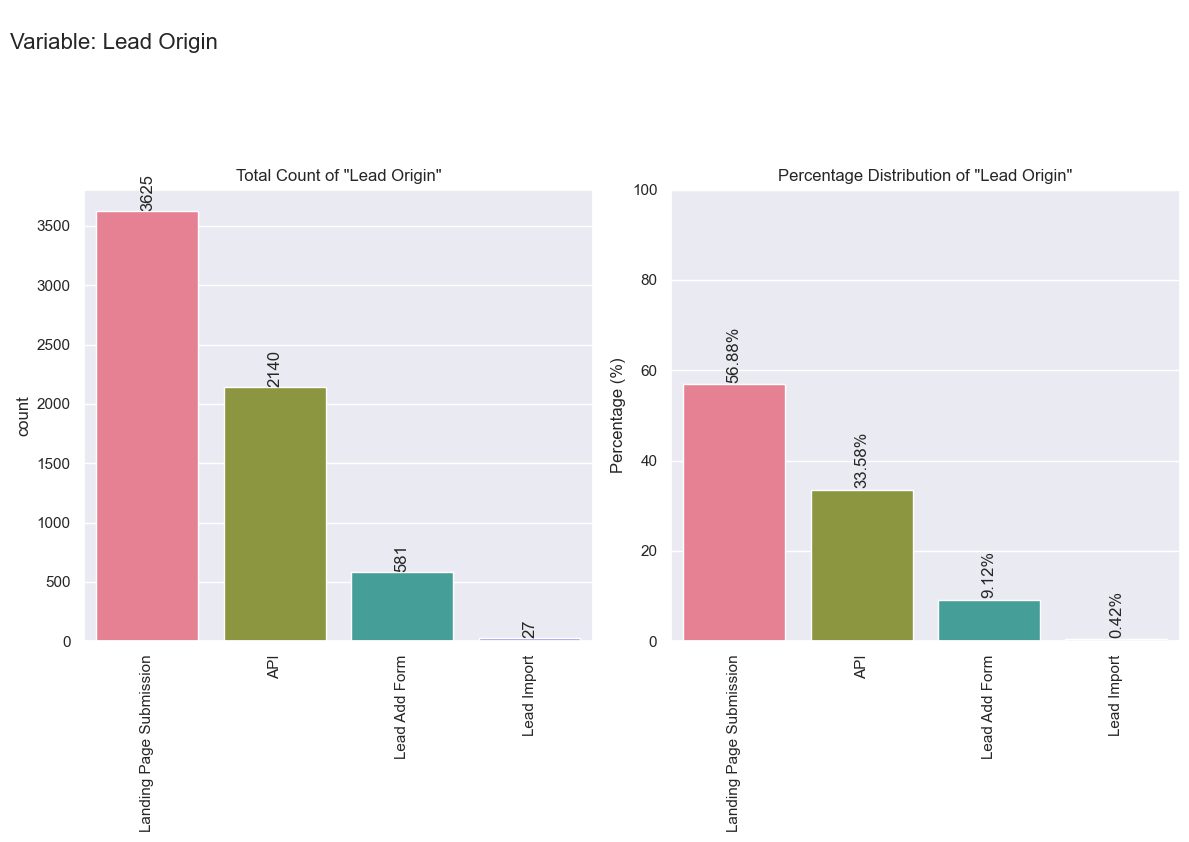

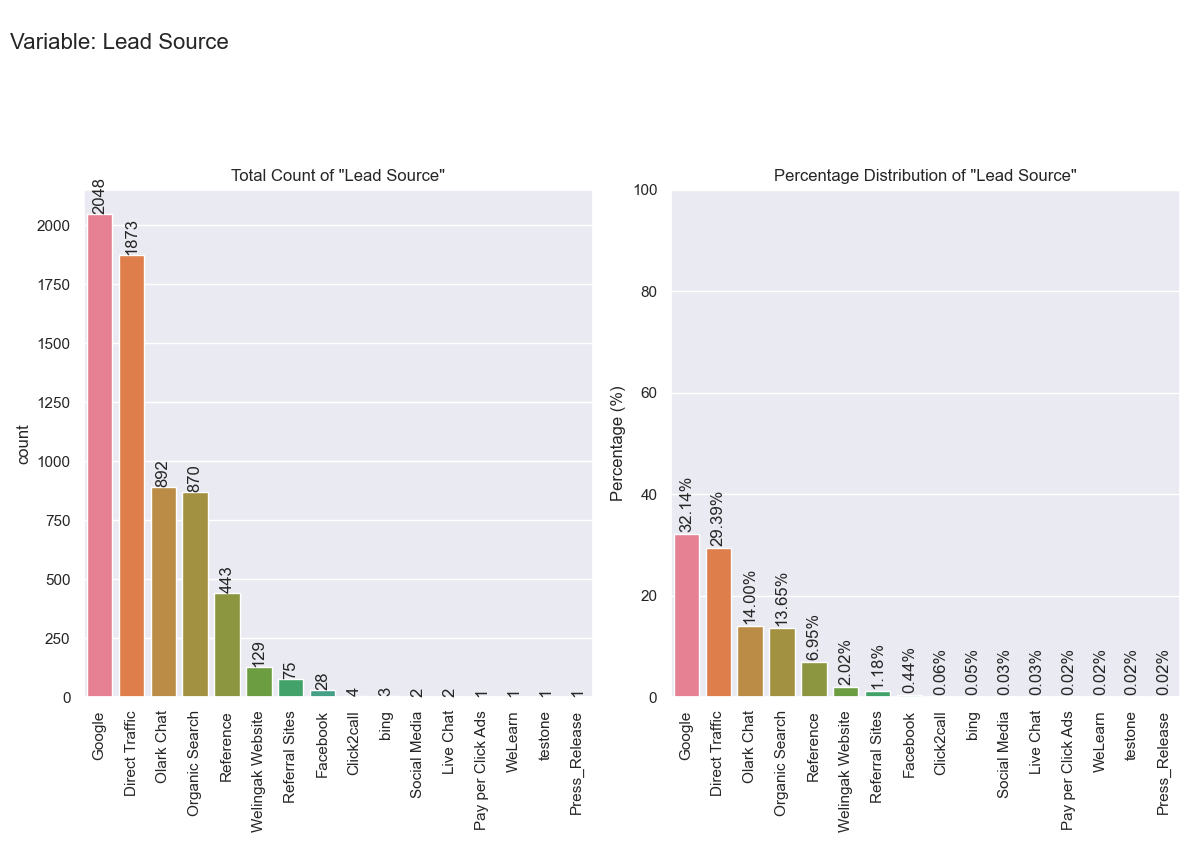

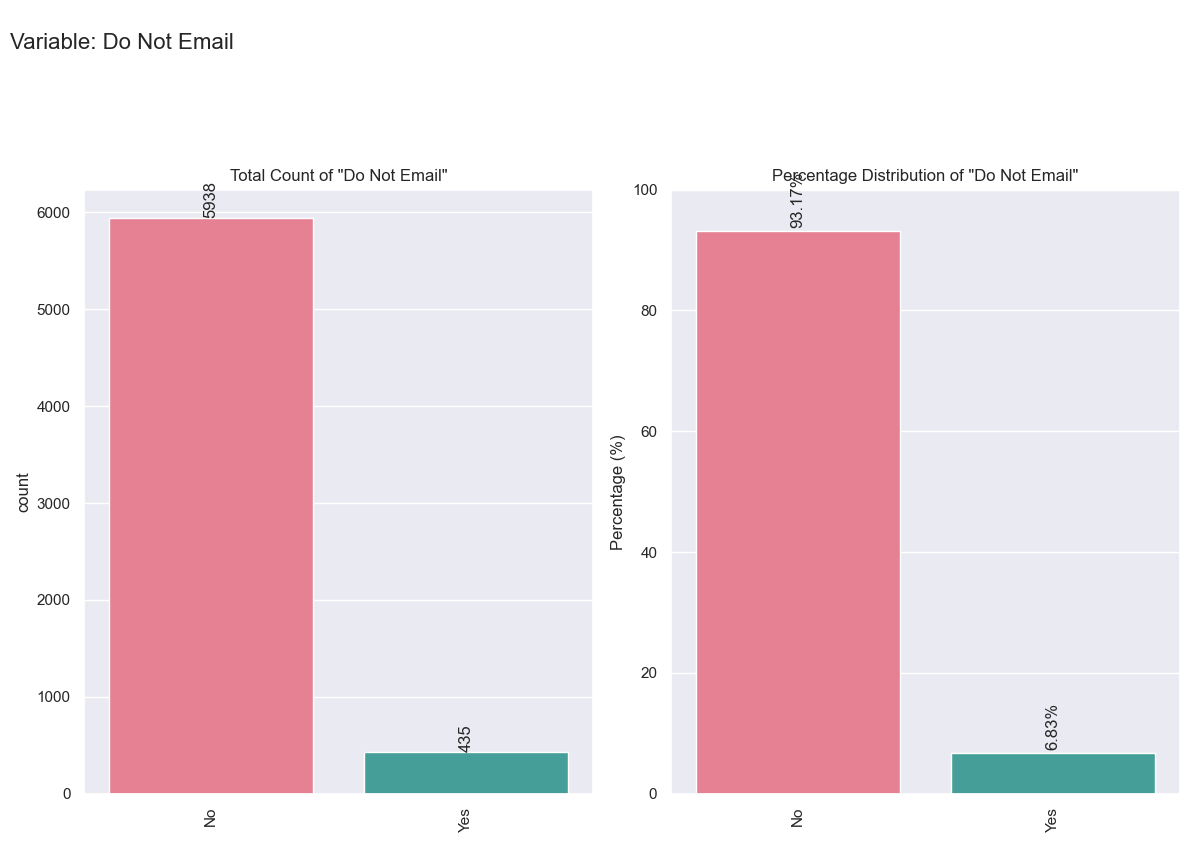

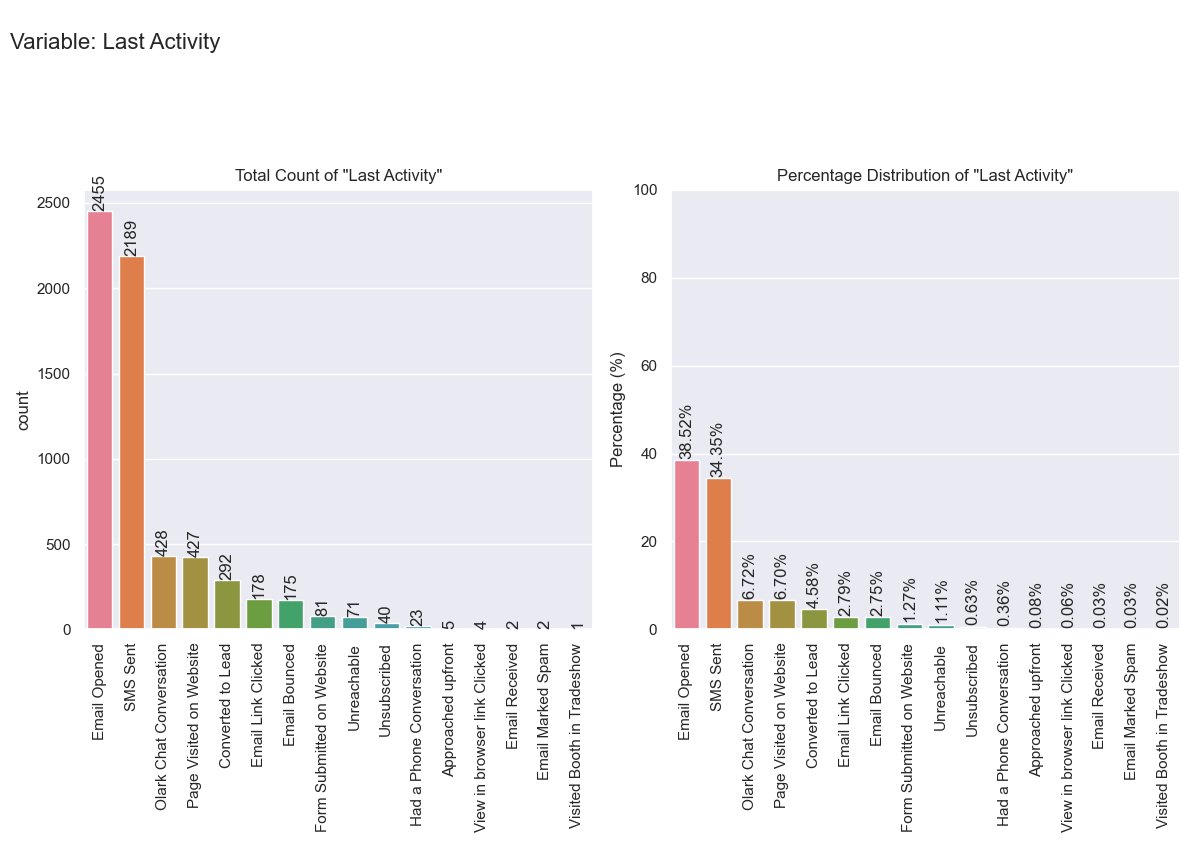

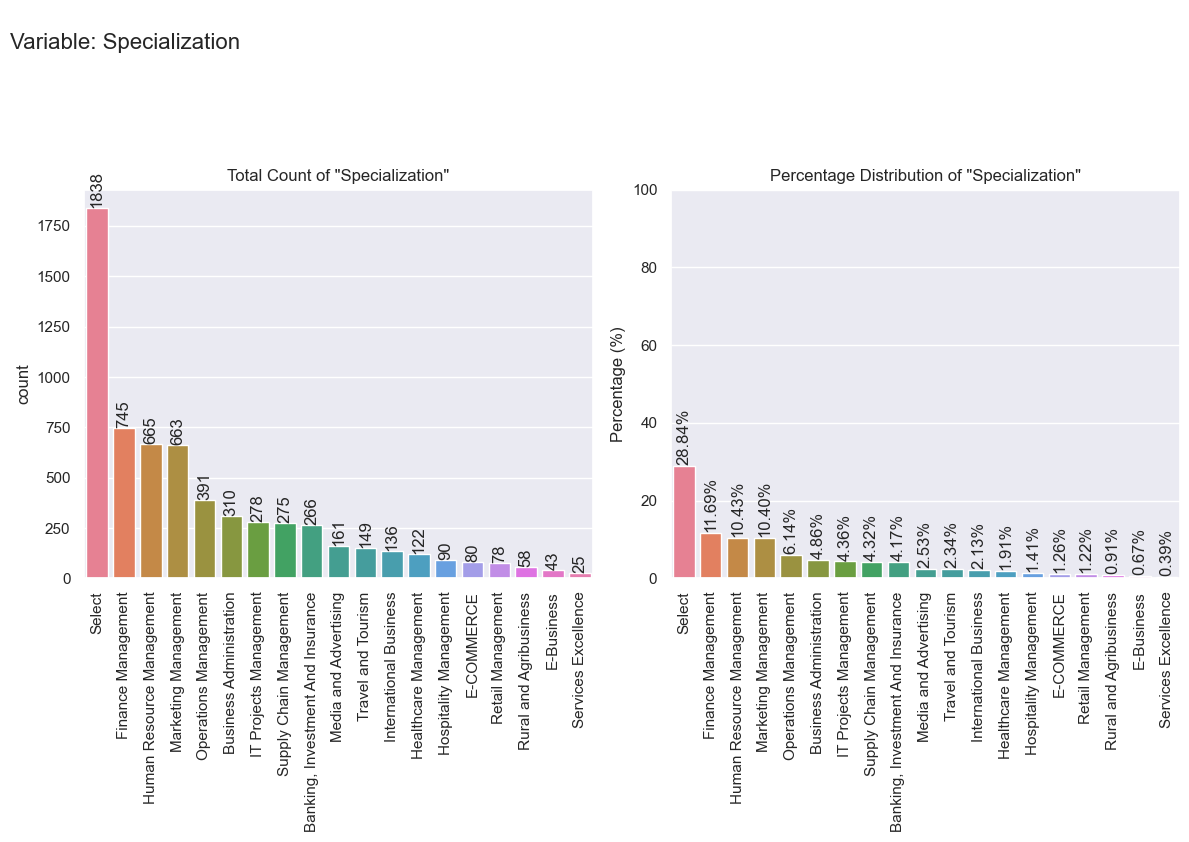

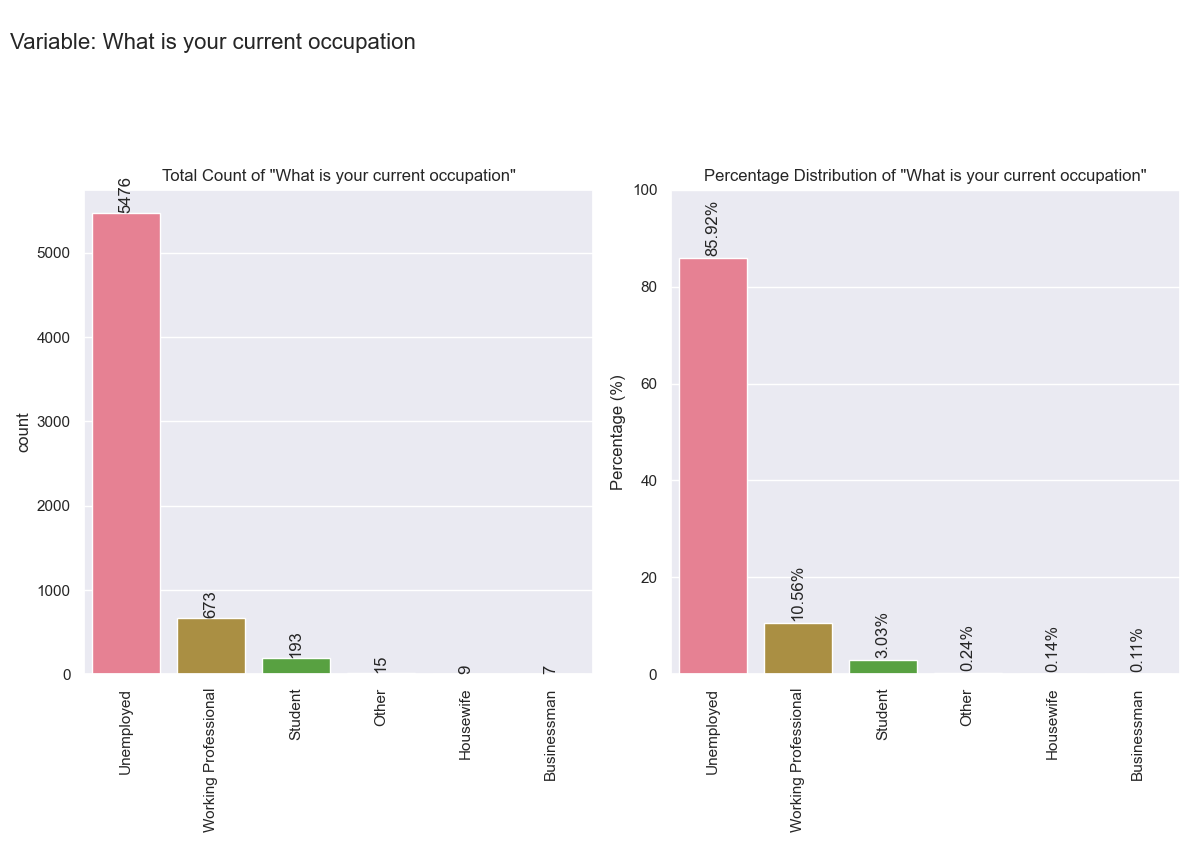

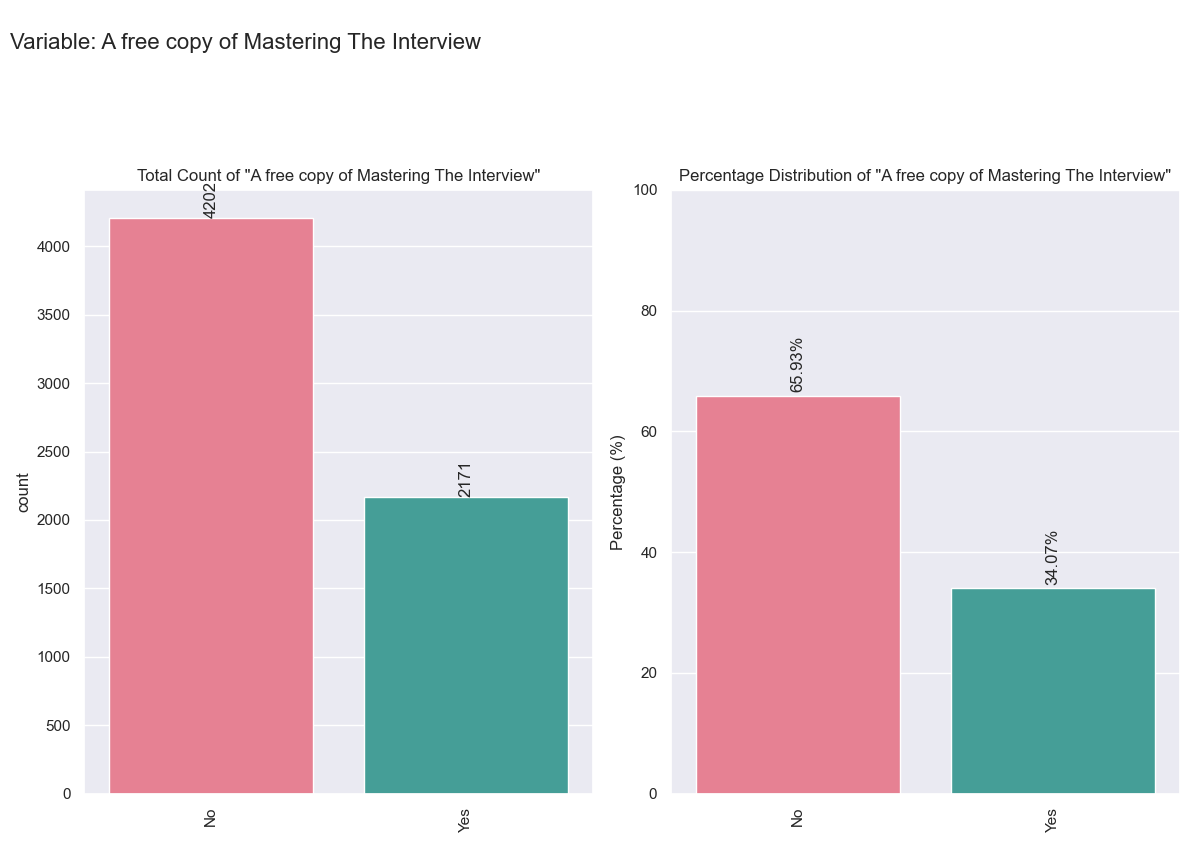

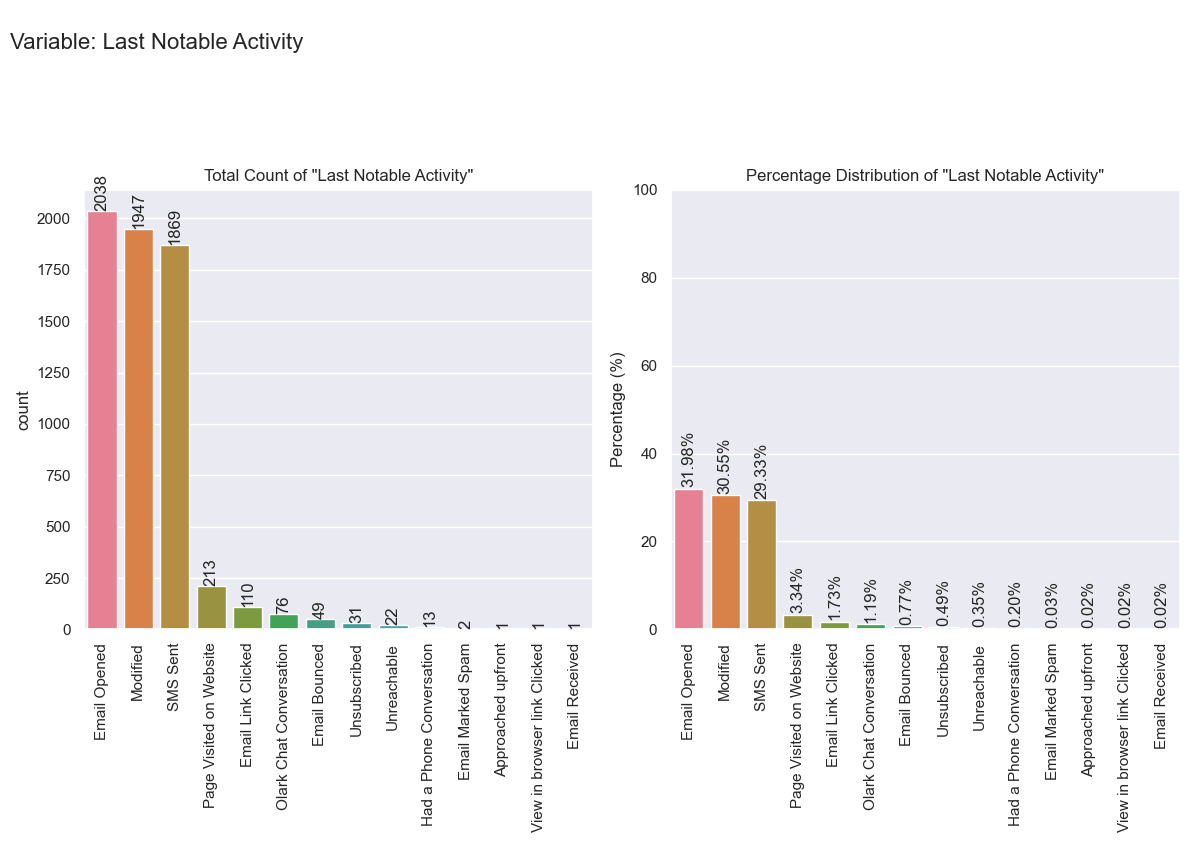

In [40]:
# Visualize Categorical Variables
## Define a consistent color palette
color_palette = sns.color_palette("pastel")

## Function to visualize distributions of categorical variables
def plot_categorical_distribution(df, categorical_columns):
    
    for col in categorical_columns:
        # Use a consistent color palette across all plots for the same column
        palette = sns.color_palette("husl", df[col].nunique())

        # Create 1 row, 2 columns for the plots
        fig, axes = plt.subplots(1, 2, figsize=(12, 8))  

        # Add a main title for the entire figure and align it to the left
        fig.suptitle(f'\nVariable: {col}', 
                     fontsize=16, 
                     ha='left',  # Align title to the left
                     x=0.01,     # Position title closer to the left edge
                     y=1.05)     # Adjust vertical position of the title

        # Bar plot with count (left side)
        sns.countplot(
            x=col,
            data=df,
            ax=axes[0],
            order=df[col].value_counts().index,
            palette=palette
        )
        axes[0].set_title(f'Total Count of "{col}"')  # Title for bar plot
        axes[0].tick_params(axis='x', rotation=90)
        axes[0].set_xlabel('')  # Remove x-axis title

        # Display count values on top of the bars with 0 decimal places and rotate them by 90 degrees
        for p in axes[0].patches:
            axes[0].annotate(f'{int(p.get_height())}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom',
                             rotation=90)

        # Bar plot with percentage (right side)
        value_counts = df[col].value_counts()
        total = len(df[col])
        percentage_counts = (value_counts / total) * 100
        sns.barplot(
            x=percentage_counts.index,
            y=percentage_counts.values,
            ax=axes[1],
            order=df[col].value_counts().index,
            palette=palette
        )
        axes[1].set_title(f'Percentage Distribution of "{col}"')  # Title for percentage bar plot
        axes[1].set_ylabel('Percentage (%)')
        axes[1].tick_params(axis='x', rotation=90)
        axes[1].set_ylim(0, 100)  # Set y-axis limit from 0% to 100%
        axes[1].set_xlabel('')  # Remove x-axis title

        # Display percentages on top of the bars with two decimal places and rotate them by 90 degrees
        for i, percentage in enumerate(percentage_counts):
            axes[1].text(i, percentage + 1, f'{percentage:.2f}%', ha='center', rotation=90)

        # Adjust layout for better readability and to prevent overlapping
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to leave space for the main title
        
        # Show the plots
        plt.show()

## Filter categorical columns to include only those present in the dataframe
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

## Visualize Categorical columns if they exist
if existing_categorical_columns:
    print("\nVisualizing Categorical Variables:")
    plot_categorical_distribution(df, existing_categorical_columns)

#### Note 6: Detailed Distribution and Key Insights from Categorical Variables
1. **Lead Origin**
   - **Distribution:**
     - Landing Page Submission: 3625 (56.88%)
     - API: 2140 (33.58%)
     - Lead Add Form: 581 (9.12%)
     - Lead Import: 27 (0.42%)
   - **Insight:** Landing pages are effective; optimize content for better lead acquisition.

2. **Lead Source**
   - **Distribution:**
     - Google: 2048 (52.23%)
     - Direct Traffic: 1873 (47.77%)
   - **Insight:** Successful SEO efforts; enhance visibility on these platforms for more leads.

3. **Do Not Email**
   - **Distribution:**
     - No: 5938 (93.17%)
     - Yes: 435 (6.83%)
   - **Insight:** Majority prefer not to receive emails; reconsider email marketing strategies.

4. **Last Activity**
   - **Distribution:**
     - Email Opened: 2038 (34.81%)
     - Modified: 1947 (33.26%)
     - SMS Sent: 1869 (31.93%)
   - **Insight:** Reinforces effectiveness of email communication channels.

5. **Specialization**
   - **Distribution:**
     - Select: 1838 (28.84%)
     - Finance Management: 745 (11.69%)
     - Human Resource Management: 665 (10.43%)
     - Marketing Management: 663 (10.40%)
     - Operations Management: 391 (6.14%)
     - Other specializations collectively represent the remaining responses.
   - **Insight:** The high count for *Select* suggests confusion or insufficient options; popular specializations like *Finance*, *HR*, and *Marketing* indicate strong interest, while less common fields may need more awareness.

6. **What is Your Current Occupation**
   - **Distribution:**
     - Unemployed: 5476 (88.76%)
     - Working Professional: 673 (10.94%)
     - Student: 193 (3.10%)
     - Other categories have minimal representation.
   - **Insight:** The overwhelming majority are unemployed, which may affect conversion potential; target audience may need reevaluation.

7. **A Free Copy of Mastering The Interview**
   - **Distribution:**
     - No: 4202 (65.93%)
     - Yes: 2171 (34.07%)
   - **Insight:** High opt-out rate suggests this offer may not resonate; explore alternative incentives.

8. **Last Notable Activity**
   - **Distribution:**
     - Email Opened: 2038 (34.81%)
     - Modified: 1947 (33.26%)
     - SMS Sent: 1869 (31.93%)
     - Other categories have lesser representation.
   - **Insight:** High engagement through emails suggests effectiveness but requires analysis on conversion correlation.


### 3.1.2. Numerical Variables

In [41]:
# Generate descriptive statistics for Numerical Variables with specified percentiles
df.describe(percentiles=[.05,.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.480935,3.624196,535.224541,2.480464
std,0.499676,5.048555,565.374753,2.167364
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1022.000000,3.500000
90%,1.000000,8.000000,1428.800000,5.000000
95%,1.000000,10.000000,1592.400000,6.000000


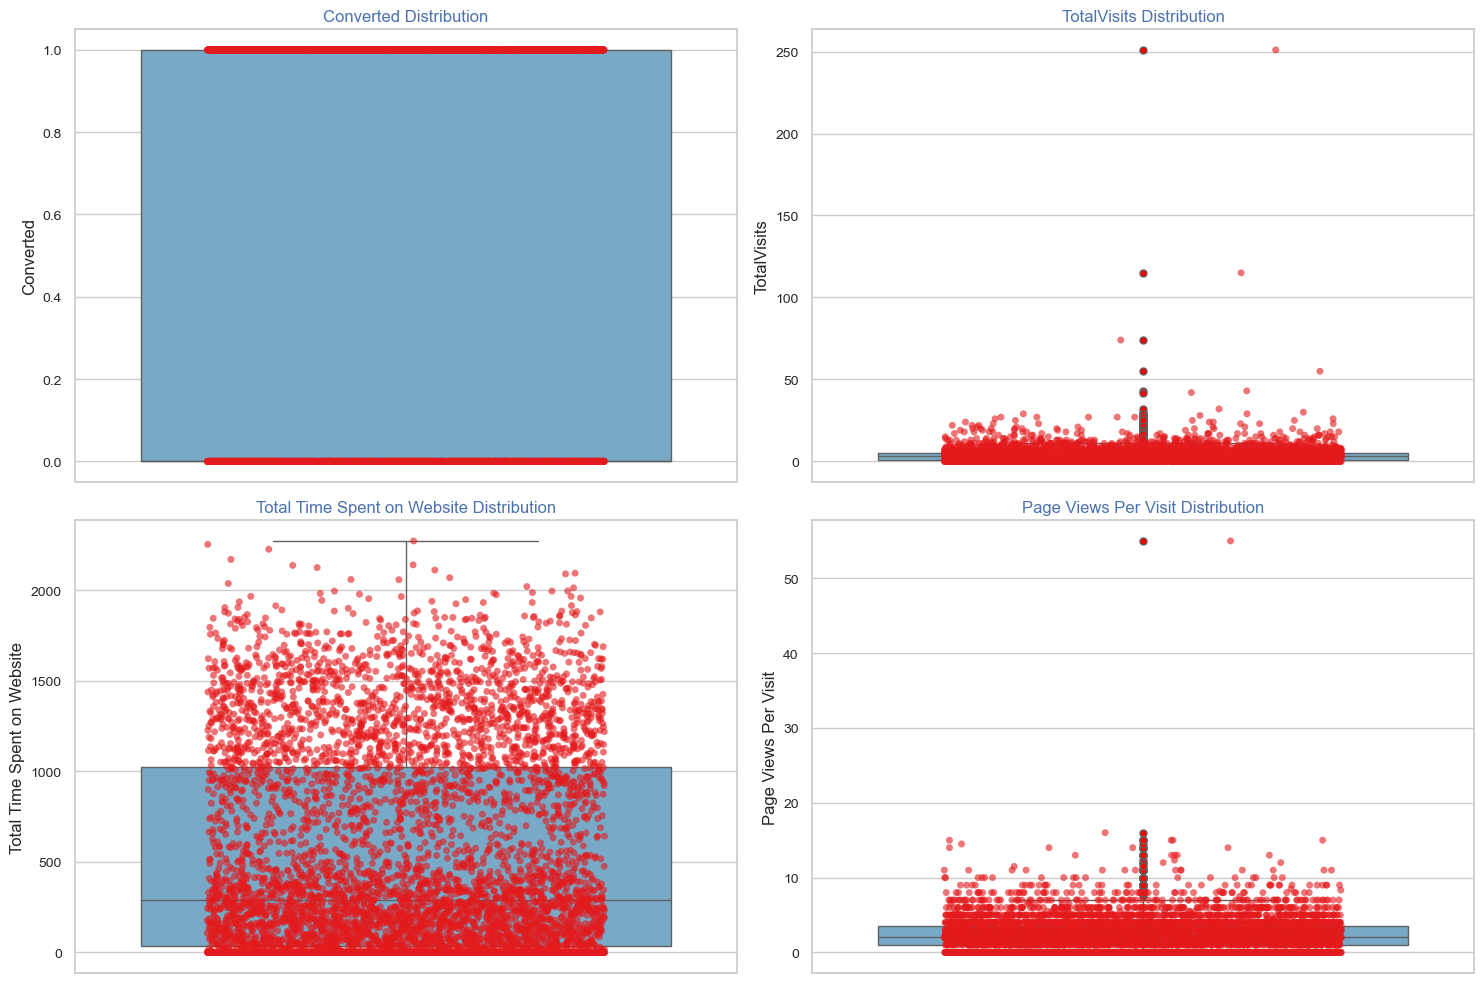

No outliers detected in column Converted.
Number of outliers in column TotalVisits: 205
Outlier values: [ 13.  17.  12.  13.  12.  13.  14.  17.  21.  15.  13.  22.  13.  13.
  21.  13.  14.  13.  16.  13.  18.  12.  14.  15.  20.  43.  18.  13.
  16.  12.  14.  13.  13.  14.  14.  22.  30.  16.  15.  13.  14.  13.
  13.  16.  23.  12.  55.  18.  21.  12.  25.  20.  13.  14.  18.  14.
  27.  17.  16.  15.  12.  15.  29.  16.  12.  16.  23.  12.  13.  24.
  18.  18.  14.  16.  17.  13.  14.  14.  18.  14.  13.  14.  16.  19.
  12.  12.  20.  14.  13.  13.  15.  14.  16.  18.  12.  12.  19.  12.
  12.  12.  13.  26.  14.  21.  14.  12.  16.  74.  12.  13.  24.  14.
  23.  19.  12.  12.  14.  13.  16.  19.  14.  18. 115.  18.  21.  22.
  15.  16.  15.  14.  20.  14.  17.  25. 251.  24.  14.  12.  12.  32.
  13.  13.  15.  13.  18.  26.  12.  12.  16.  15.  17.  13.  17.  20.
  13.  12.  14.  20.  16.  28.  20.  17.  20.  13.  15.  15.  27.  27.
  23.  12.  20.  12.  13.  13.  14.  17.  12

In [42]:
# Visualize the Distributions of Numerical Variables using histograms
## Set up a 2x2 grid for subplots
n = 2  # Number of columns in the subplot grid
m = 2  # Number of rows in the subplot grid
ct = 1  # Counter for subplot indexing

## Setting figure size
plt.figure(figsize=(15, 10))

## Store outlier information for output
output = []

## Define numcols as a list of numerical columns from the dataframe
numcols = df.select_dtypes(include=['number']).columns.tolist()

for cat in numcols[:4]:  # Limit to first 4 numerical columns for a 2x2 grid
    sns.set_style("whitegrid")  # Use a cleaner style with gridlines
    plt.subplot(m, n, ct)
    
    # Calculate IQR and bounds for outlier detection
    Q1 = df[cat].quantile(0.25)
    Q3 = df[cat].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[cat] < lower_bound) | (df[cat] > upper_bound)]
    
    # Boxplot with custom flier properties and lighter color palette
    flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
    
    sns.boxplot(y=df[cat], palette="Blues", flierprops=flierprops)
    
    # Add strip plot with a color palette instead of black for better aesthetics
    sns.stripplot(y=df[cat], palette="Set1", jitter=0.3, alpha=0.6)

    title = cat + " Distribution"
    plt.title(title, color="b", fontsize=12)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10, rotation=90)
    
    # Format outlier information and append to output list
    if not outliers.empty:
        output.append(f"Number of outliers in column {cat}: {len(outliers)}")
        output.append(f"Outlier values: {outliers[cat].values}")
    else:
        output.append(f"No outliers detected in column {cat}.")
    
    ct += 1

plt.tight_layout()
plt.show()

## Show the collected outlier information in the desired format
for line in output:
    print(line)

#### Note 7: Key Insights from Univariate Analysis of Numerical Variables

1. **Converted**
   - This variable only takes values 0 and 1, representing whether a lead has converted or not. It is not a continuous variable, so there are no outliers.
   - Insight: The conversion rate is close to 50%, indicating there is room for improvement in marketing strategies to increase conversions.

2. **TotalVisits**
   - Mean number of visits is ~3.62 with an interquartile range (IQR) of [1,5].
   - Outliers detected with a maximum value of up to 251 visits.
   - Insight: Although most users visit the website between one and five times, a small group exhibits significantly higher visit frequencies, which may indicate unusual behavior or bot activity.
   - 99% of leads have fewer than 18 visits, but the maximum value is 251, indicating that a small number of leads visit the website many times.

3. **Total Time Spent on Website**
   - Mean time spent on the website is ~535 seconds (~9 minutes), with an IQR of [34s,1022s].
   - No significant outliers detected.
   - Insight: Users spend a reasonable amount of time on the website, but there is a wide range in engagement levels that could be further explored for segmentation.
   - The distribution is right-skewed, with many users spending a short time and a few spending much longer.

4. **Page Views Per Visit**
   - Mean page views per visit is ~2.48 with an IQR of [1,3.5].
   - Outliers detected with some users viewing up to over 50 pages in one session.
   - Insight: Most users view between one and three pages per visit; however, there are a few cases where users view an unusually high number of pages in a single session.
   - 99% of values are less than 9, but the maximum value is 55.

**Outlier Handling Decision:**
1. For variables like `TotalVisits` and `Page Views Per Visit`, consider investigating the nature of the outliers:
    * If these represent genuine customer behavior (e.g., highly engaged users), retain them for model training.
    * If they are due to data entry errors or bot activity, consider removing them before model training to improve model performance.
    * For now, we will consult with X Education to understand the cause of these outliers. ***Since there is insufficient information at this point, we will not remove the outliers in this analysis and report***.

2. For `Total Time Spent on Website`, no action is needed since no significant outliers were detected.

## 3.2. Bivariate analysis-related to the  `target Converted variable`

### 3.2.1. Categorical Variables- related to the  `target Converted variable`

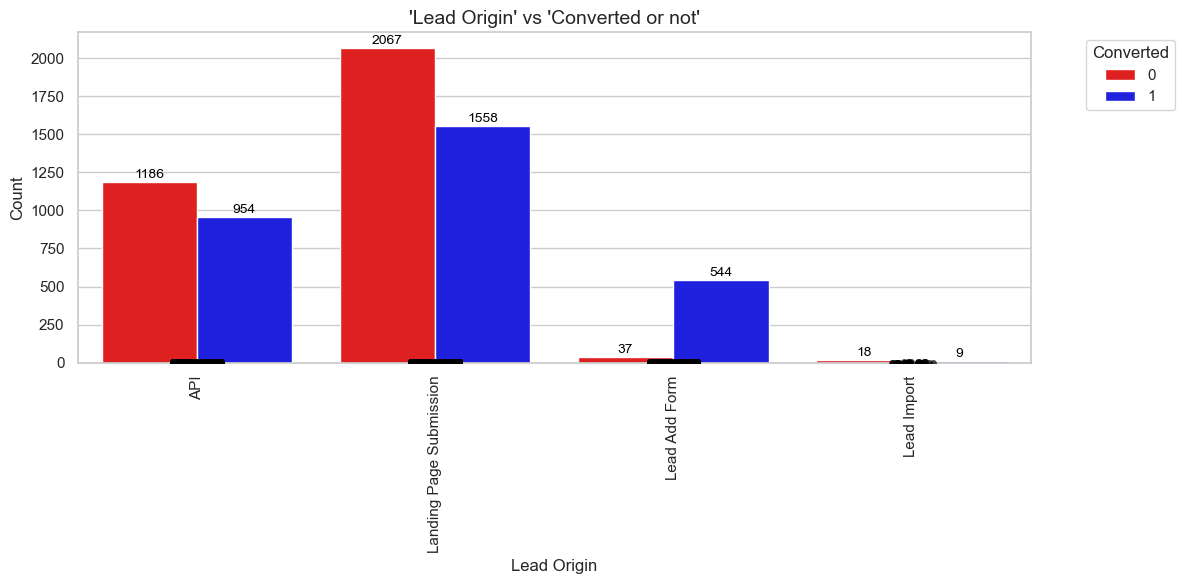

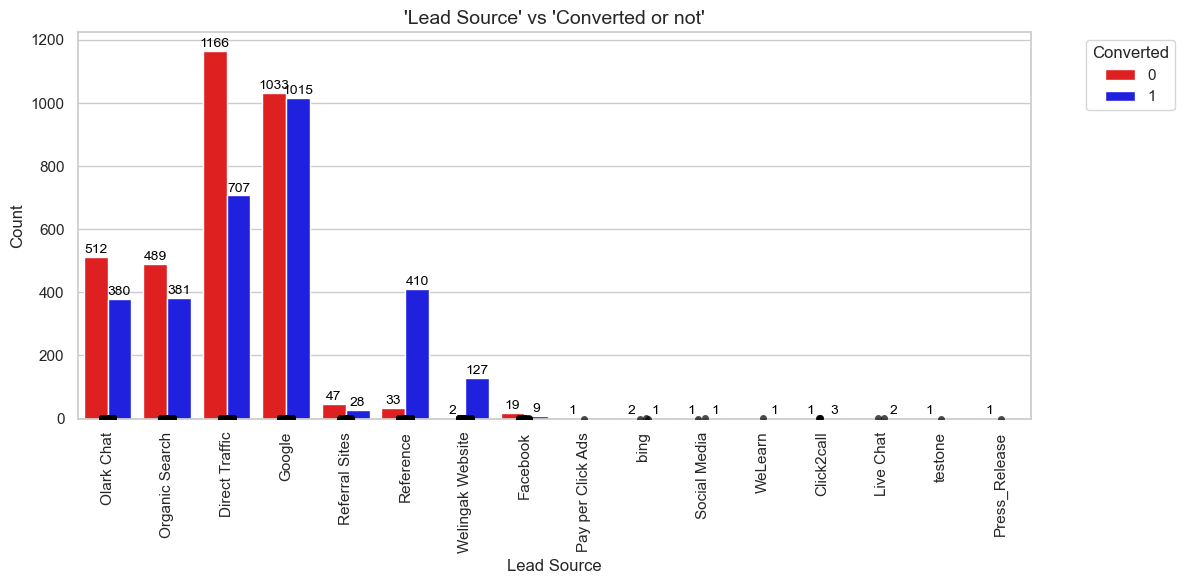

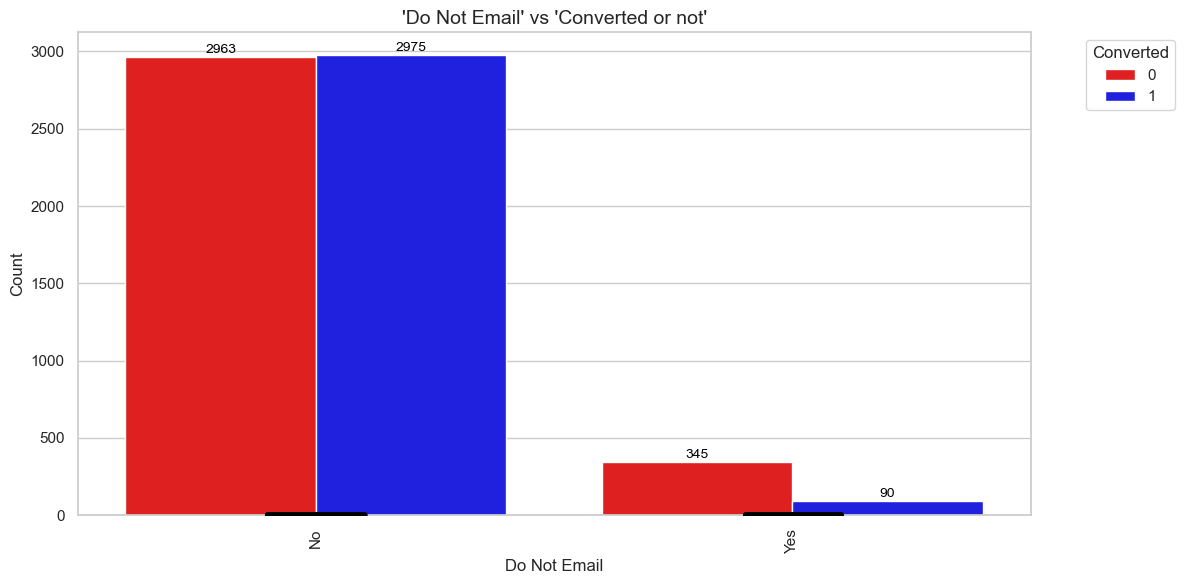

In [ ]:
# Set theme for aesthetics
sns.set_theme(style="whitegrid")

# Filter categorical columns to include only those present in the dataframe
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

# Define custom colors for Converted
palette = {0: 'red', 1: 'blue'}  # Red for not converted, Blue for converted

# Create plots for each categorical column
for col in existing_categorical_columns:
    plt.figure(figsize=(12, 6))
    
    # Create count plot
    sns.countplot(
        data=df, 
        x=col, 
        hue='Converted', 
        palette=palette
    )
    
    # Overlay stripplot for individual data points
    sns.stripplot(
        x=col, 
        y='Converted', 
        data=df, 
        color='black', 
        dodge=True, 
        alpha=0.7
    )
    
    plt.title(f"'{col}' vs 'Converted or not'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend(title='Converted', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add annotations for count values on bars
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center',
                        va='center',
                        fontsize=10,
                        color='black',
                        xytext=(0, 5), 
                        textcoords='offset points')
    
    # Improve Spacing
    plt.tight_layout()
    plt.show()

#### Note 8: Insights from Bivariate Analysis of Categorical Variables Related to the Target Variable `Converted`

1. **Lead Origin vs. Converted-or-not**
    - **Distribution:**
      - Landing Page Submission: Higher conversion rate compared to other origins.
      - API: Moderate conversion rate.
      - Lead Add Form and Lead Import: Lower conversion rates.
    - **Insight:** Focus on optimizing landing page submissions as they show higher conversion rates.

2. **Lead Source vs. Converted-or-not**
    - **Distribution:**
      - Google and Direct Traffic: Higher conversion rates.
      - Other sources: Lower conversion rates.
    - **Insight:** Continue leveraging Google and Direct Traffic for lead generation.

3. **Do Not Email vs. Converted-or-not**
    - **Distribution:**
      - No: Higher conversion rate.
      - Yes: Lower conversion rate.
    - **Insight:** Email communication is effective; consider alternative strategies for those who opt out.

4. **Last Activity vs. Converted-or-not**
    - **Distribution:**
      - Email Opened and SMS Sent: Higher conversion rates.
      - Other activities: Lower conversion rates.
    - **Insight:** Email and SMS campaigns are effective; focus on these channels.

5. **Specialization vs. Converted-or-not**
    - **Distribution:**
      - Finance Management, Human Resource Management, Marketing Management: Higher conversion rates.
      - Other specializations: Lower conversion rates.
    - **Insight:** Tailor marketing efforts towards popular specializations.

6. **What is Your Current Occupation vs. Converted-or-not**
    - **Distribution:**
      - Working Professional and Student: Higher conversion rates.
      - Unemployed: Lower conversion rate.
    - **Insight:** Target working professionals and students for higher conversion potential.

7. **A Free Copy of Mastering The Interview vs. Converted-or-not**
    - **Distribution:**
      - Yes: Higher conversion rate.
      - No: Lower conversion rate.
    - **Insight:** Offering a free copy of "Mastering The Interview" is an effective incentive.

8. **Last Notable Activity vs. Converted-or-not**
    - **Distribution:**
      - Email Opened and SMS Sent: Higher conversion rates.
      - Other activities: Lower conversion rates.
    - **Insight:** Focus on email and SMS follow-ups to increase conversions.

### 3.2.2. Numerical Variables- related to the  `target Converted variable`

In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Create an enhanced heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size for better clarity
sns.heatmap(numeric_df.corr(), 
            annot=True,          # Display correlation values in each cell
            fmt='.2f',           # Format the annotation to 2 decimal places
            cmap='coolwarm',     # Use a diverging color palette for better contrast
            vmin=-1, vmax=1,     # Set color scale limits to -1 and 1 (correlation range)
            center=0,            # Center the colormap at 0
            linewidths=0.5,      # Add lines between cells for better separation
            linecolor='white',   # Set line color to white for a clean look
            cbar_kws={'shrink': .8})  # Shrink the color bar slightly for aesthetics

plt.title('Correlation Heatmap', fontsize=18)  # Add a title with a larger font size
plt.show()

#### Note 9: Insights from Correlation Trends of Numerical Variables Related to the Target Variable `Converted`

1. **TotalVisits vs. Converted-or-not**
    - **Correlation Coefficient:** 0.01
    - **Insight:** There is a very weak positive correlation between the total number of visits and the conversion rate. This suggests that the number of visits alone is not a strong predictor of whether a lead will convert.

2. **Total Time Spent on Website vs. Converted-or-not**
    - **Correlation Coefficient:** 0.31
    - **Insight:** There is a moderate positive correlation between the total time spent on the website and the conversion rate. This indicates that leads who spend more time on the website are more likely to convert. This variable could be a significant predictor in the model.

3. **Page Views Per Visit vs. Converted-or-not**
    - **Correlation Coefficient:** -0.06
    - **Insight:** There is a very weak negative correlation between the number of page views per visit and the conversion rate. Similar to total visits, this variable alone is not a strong predictor of not conversion.

**Summary**:
- The **Total Time Spent on Website** shows a ***moderate positive correlation*** with the conversion rate, suggesting that ***it is an important factor in predicting lead conversion***.
- Both **TotalVisits** and **Page Views Per Visit** have ***very weak correlations*** with the conversion rate, indicating that these variables alone ***may not be strong predictors of conversion or not***. However, they could still provide valuable information when combined with other variables in a predictive model.

# Step 4: Feature Engineering-Creating Dummy Variables and Encoding for Binary Variables 

In [ ]:
# Update the list of existing categorical columns to include only those present in the DataFrame
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]
# Separate binary and non-binary categorical columns
binary_categorical_columns = [col for col in existing_categorical_columns if df[col].nunique() == 2]
non_binary_categorical_columns = [col for col in existing_categorical_columns if df[col].nunique() > 2]
# Print the shape of the current df dataset 
print(f'The shape of the current df dataset is: {df.shape}')
print(f'List of Categorial Variables of the current df dataset: {existing_categorical_columns}')
print(f'Binary Categorical Variables: {binary_categorical_columns}')
print(f'Non-binary Categorical Variables: {non_binary_categorical_columns}')
print(f'List of Numerical Variables of the current df dataset: {numerical_columns}')

In [ ]:
# Display the list of columns in the current df dataset
df.columns

In [ ]:
# Create Dummy Variables for the 'Specialization' column.
dum_spl = pd.get_dummies(df['Specialization'],prefix='Specialization').astype(int)
# Remove the 'Specialization_Select' column if it exists.
dum_spl = dum_spl.drop(['Specialization_Select'], axis=1)
# Concatenate the dummy variables with the original DataFrame.
df = pd.concat([df, dum_spl], axis=1)
# Drop the 'Specialization' column from the DataFrame.
df = df.drop(['Specialization'], axis=1)
# Print the list of columns in the current df dataset
df.columns

In [ ]:
# Display the first few rows of the current df dataset
df.head()

In [ ]:
# Print the shape of the current df dataset 
print(f'The shape of the current df dataset is: {df.shape}')

In [ ]:
# Create Dummy Variables for the remaining Non-binary Categorical columns 
dum_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity']
df_dummies = pd.get_dummies(df[dum_cols], drop_first=True).astype(int)
# Add the Dummy Variables Non-binary Categorical columns to the original df dataset
df = pd.concat([df, df_dummies], axis=1)
# Print the list of columns in the current df dataset
df.columns

In [ ]:
# Display the first few rows of the current df dataset
df.head()

In [ ]:
# Print the shape of the current df dataset 
print(f'The shape of the current df dataset is: {df.shape}')

In [ ]:
# Drop the Non-binary Categorical columns for which the Dummy Variables have been created
df = df.drop(columns= dum_cols, axis=1)
# Print the list of columns in the current df dataset
df.columns

In [ ]:
# Display the first few rows of the current df dataset
df.head()

In [ ]:
# Print the shape of the current df dataset 
print(f'The shape of the current df dataset is: {df.shape}')

In [ ]:
# Encode for Binary Categorical columns
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[binary_categorical_columns] = df[binary_categorical_columns].apply(binary_map)
# Display the first few rows of the current df dataset
df.head()

In [ ]:
# Print the shape of the current df dataset 
print(f'The shape of the current df dataset is: {df.shape}')

In [ ]:
# Calculate the conversion rate (%) based on the 'Converted' column- after Dummy Variable Creation step
conversion_rate_dum_post = (df['Converted'].sum() / len(df)) * 100  
print(f"Conversion Rate (%) after Dummy Variable Creation: {round(conversion_rate_dum_post, 2)}%")  

#### Note 10: Preliminary Observations of Conversion Rate (%)

After conducting data cleaning and creating dummy variables, we have observed the following conversion rates in our dataset:

- ***Initial Conversion Rate***: 38.54%
- ***Conversion Rate after Data Cleaning***: 48.09%
- ***Conversion Rate after Creating Dummy Variables***: 48.09%

**Insights from Conversion Rate Changes:**

1. **Increase in Conversion Rate**:
   - The initial conversion rate of 38.54% indicates that a significant portion of leads did not convert into paying customers.
   - The increase to 48.09% after data cleaning suggests that the quality of the dataset has improved, allowing for more accurate predictions regarding lead conversion.

2. **Stability of Conversion Rate Post-Dummy Variable Creation**:
   - The conversion rate remained stable at 48.09% after creating dummy variables, indicating that the encoding process did not adversely affect the target variable.
   - This stability suggests that the categorical variables were effectively transformed into a format suitable for modeling without introducing bias or noise.

**Implications for Future Modeling:**

- **Model Performance**: 
  - An increased conversion rate indicates that the dataset may now better reflect the actual behavior of leads, which is crucial for training predictive models.
  - With a higher percentage of converted leads, models trained on this data are likely to perform better in predicting future conversions.

- **Feature Importance**:
  - Understanding which features contribute to the conversion rate will be essential in refining our model and focusing on the most impactful variables.
  - The insights gained from the EDA process will guide feature selection and engineering in subsequent modeling steps.

**Conclusion:**

The analysis of conversion rates highlights the importance of data cleaning and proper handling of categorical variables. The improvements observed in conversion rates provide a solid foundation for building predictive models that can effectively identify promising leads for X Education.


# Step 5: Preparing Data for Modeling

## 5.1. Define Features and Target Variable

In [ ]:
# Define features (X)
X = df.drop(['Converted'], axis=1)
X.head()

In [ ]:
# Define target variable (y)
y= df.Converted
y.describe()

## 5.2. Split Data into Training and Testing Sets

In [ ]:
# Split the data into training and testing sets (70/30 split)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Shape of the X_train: ', X_train.shape)
print('Shape of the X_test: ', X_test.shape)
print('Shape of the y_train: ', y_train.shape)
print('Shape of the y_test: ', y_test.shape)

In [ ]:
# Describe for the X_train
X_train.describe().T

In [ ]:
# Describe for the X_test
X_test.describe().T

In [ ]:
# Describe for the y_train
y_train.describe()

In [ ]:
# Describe for the y_test
y_test.describe()

#### Note 11: Overview of Train-Test Split

The dataset has been split into training and testing sets with a 70/30 ratio. 

**Training Set:**

- **Total Samples:** 4461
- **Average "Do Not Email":** 6.75%
- **Average "Total Visits":** 3.57
- **Average "Total Time Spent on Website":** 536.57 seconds
- **Average "Page Views Per Visit":** 2.47
- **Conversion Rate (y_train):** 47.79%

**Testing Set:**

- **Total Samples:** 1912
- **Average "Do Not Email":** 7.01%
- **Average "Total Visits":** 3.74
- **Average "Total Time Spent on Website":** 532.08 seconds
- **Average "Page Views Per Visit":** 2.51
- **Conversion Rate (y_test):** 48.80%

The distribution of the target variable (`Converted`) is ***balanced across both sets***. Most features exhibit similar statistical characteristics; however, `TotalVisits` and `Page Views Per Visit` show ***higher maximum values in the testing set***, indicating potential outliers. As discussed in `Note 7`, we will consult with X Education to understand the cause of these outliers. ***Due to insufficient information, we would not remove them from this analysis***.

This discrepancy in outliers may influence the performance of the logistic regression model. Fortunately, as analyzed in `Note 9`, ***these two features have very weak correlations with the conversion rate, indicating they may not be strong predictors of conversion***.

***To mitigate the impact of outliers that could affect model performance, we have decided to apply the `Robust Scaling Technique` to the continuous variables of $$X_{\text{train}}$$ and $$X_{\text{test}}$$ in the subsequent rescaling step.***

## 5.3. Rescaling the Features

In [ ]:
# Determine Features to Scale
scale_vars =  ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [ ]:
# Describe for the X_train dataset for the Scaled Features- before scaling
X_train[scale_vars].describe(percentiles=[.05,.25, .5, .75, .90, .95, .99])

In [ ]:
# Describe for the X_test dataset for the Scaled Features- before scaling
X_test[scale_vars].describe(percentiles=[.05,.25, .5, .75, .90, .95, .99])

In [ ]:
# Initialize the the RobustScaler
scaler = RobustScaler()
# Apply scaling to the Scaled Features in the Training dataset
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
# Apply scaling to the Scaled Features in the Testing dataset
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [ ]:
# Describe for the X_train dataset for the Scaled Features- after scaling
X_train[scale_vars].describe(percentiles=[.05,.25, .5, .75, .90, .95, .99])

In [ ]:
# Describe for the X_test dataset for the Scaled Features- after scaling
X_test[scale_vars].describe(percentiles=[.05,.25, .5, .75, .90, .95, .99])

## 5.4. Investigating the Correlations in Training and Testing sets

### 5.4.1. Training set

In [ ]:
# Combine X_train and y_train into a single DataFrame
df_train = pd.DataFrame(X_train)
df_train['Converted'] = y_train
# Print the correlation matrix
df_train.corr()

In [ ]:
# Visualize the correlation matrix of the Training set
plt.figure(figsize=(20,30))
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix)
plt.show()

In [ ]:
# Get the correlation values with respect to 'Converted'
cor_target = correlation_matrix['Converted']

# Define the threshold based on the Mean value of absolute correlations
threshold = cor_target.abs().mean()  

# Filter features with absolute correlation above the threshold
selected_features = cor_target[cor_target.abs() > threshold]

# Step 5: Create a DataFrame for selected features and their correlation values
features_correlation_df = pd.DataFrame({
    'Features': selected_features.index,
    'Correlation Values': selected_features.values
})

#Sort the DataFrame by absolute correlation values in descending order
features_correlation_df['Absolute Correlation'] = features_correlation_df['Correlation Values'].abs()
features_correlation_df = features_correlation_df.sort_values(by='Absolute Correlation', ascending=False).drop(columns='Absolute Correlation')

# Separate positive and negative correlations into different DataFrames
positive_correlations = features_correlation_df[features_correlation_df['Correlation Values'] > 0]
negative_correlations = features_correlation_df[features_correlation_df['Correlation Values'] < 0]

# Print the sorted DataFrame with all selected features
print("Sorted Features by Top Absolute Correlation Values with respect to the 'Converted' target variable in the Training set:")
print(features_correlation_df)
print('='*100)
# Print positive correlations
print("\nTop Positive Correlations with respect to the 'Converted' target variable in the Training set:")
print(positive_correlations)
print('='*100)
# Print negative correlations
print("\nTop Negative Correlations with respect to the 'Converted' target variable in the Training set:")
print(negative_correlations)

### 5.4.2. Testing sets

In [ ]:
# Combine X_test and y_test into a single DataFrame
df_test = pd.DataFrame(X_test)
df_test['Converted'] = y_test
# Print the correlation matrix
df_test.corr()

In [ ]:
# Visualize the correlation matrix of the Testing set
plt.figure(figsize=(20,30))
correlation_matrix_test = df_test.corr()
sns.heatmap(correlation_matrix_test)
plt.show()

In [ ]:
# Get the correlation values with respect to 'Converted'
cor_target = correlation_matrix_test['Converted']

# Define the threshold based on the Mean value of absolute correlations
threshold = cor_target.abs().mean()  

# Filter features with absolute correlation above the threshold
selected_features = cor_target[cor_target.abs() > threshold]

# Step 5: Create a DataFrame for selected features and their correlation values
features_correlation_df = pd.DataFrame({
    'Features': selected_features.index,
    'Correlation Values': selected_features.values
})

#Sort the DataFrame by absolute correlation values in descending order
features_correlation_df['Absolute Correlation'] = features_correlation_df['Correlation Values'].abs()
features_correlation_df = features_correlation_df.sort_values(by='Absolute Correlation', ascending=False).drop(columns='Absolute Correlation')

# Separate positive and negative correlations into different DataFrames
positive_correlations = features_correlation_df[features_correlation_df['Correlation Values'] > 0]
negative_correlations = features_correlation_df[features_correlation_df['Correlation Values'] < 0]

# Print the sorted DataFrame with all selected features
print("Sorted Features by Top Absolute Correlation Values with respect to the 'Converted' target variable in the Testing set:")
print(features_correlation_df)
print('='*100)
# Print positive correlations
print("\nTop Positive Correlations with respect to the 'Converted' target variable in the Testing set:")
print(positive_correlations)
print('='*100)
# Print negative correlations
print("\nTop Negative Correlations with respect to the 'Converted' target variable in the Testing set:")
print(negative_correlations)


#### Note 12: Common Trends and Differences in Top Correlation Anaysis between Features and 'Converted'in Training and Testing Sets



**Positive Correlations:**
- Both datasets reveal that features such as:
  - **Total Time Spent on Website**
  - **Lead Origin_Lead Add Form**
  - **Last Activity_SMS Sent**
  - **What is your current occupation_Working Professional**
  - **Lead Source_Reference**
  
  exhibit strong positive correlations with the target variable **Converted**. This indicates that these factors positively influence the likelihood of lead conversion.

**Negative Correlations:**
- Similarly, features like:
  - **Last Notable Activity_Modified**
  - **What is your current occupation_Unemployed**
  - **Last Activity_Olark Chat Conversation**
  - **Do Not Email**
  
  show negative correlations with **Converted**. This suggests that these factors negatively impact the chances of conversion.

**Correlation Consistency:**
- There are no features that demonstrate negative correlations in one dataset while exhibiting positive correlations in the other. This consistency reinforces the reliability of the findings across both datasets.

**Differences Between the Two Dataset:**

  **Order and Correlation Values:**
- Although the most important features are similar, their order and correlation values differ between the two datasets. For instance, **Total Time Spent on Website** has a higher correlation value in the testing set compared to the training set.

 **Emergence of New Features:**
- Certain features appear in the top features list of one dataset but not in the other. For example, **Page Views Per Visit** is identified as a top feature in the testing set but is absent from the training set.

# Step 6: Model Building 

In [ ]:
# Create an instance of the LogisticRegression class.
logreg = LogisticRegression()

## 6.1. Feature Selection by RFE

In [ ]:
# Create an instance of the RFE class with the LogisticRegression estimator and specifies that 15 features should be selected.
rfe = RFE(estimator=logreg, n_features_to_select=15) 
# Fit the RFE model to the Training data
rfe = rfe.fit(X_train, y_train)

In [ ]:
# List Features that have been Selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Get the names of the selected features from the column names of the Training data (X_train) using the support_ attribute of the fitted RFE model.
col = X_train.columns[rfe.support_]

In [ ]:
# Select Columns Selected by RFE
X_train = X_train[col]

## 6.2. Create Definitions to Build Logistic  Models and Calculate for Variance Inflation Factors (VIFs) from the Training sets using the Statsmodels Library

In [ ]:
# Create Definition to Convert an integer n into its Ordinal representation
def ordinal(n):
    suffix = ['th', 'st', 'nd', 'rd'] + ['th'] * 6
    if n % 100 in [11, 12, 13]:
        return str(n) + 'th'
    return str(n) + suffix[n % 10]

In [ ]:
# Create Definition to Build Logistic Regression Models (GLM) in Each Step.
def build_model(X_train, y_train, n, model_list):
  # Fit the Logistic Regression model to the updated Training data
  X_sm_n = sm.add_constant(X_train)  # Add constant term to the model
  logm_n = sm.GLM(y_train, X_sm_n, family=sm.families.Binomial())  # Define the logistic model
  logm_n_fit = logm_n.fit()  # Fit the model
  print(f'The Estimated Parameters (Coefficients) of the {ordinal(n)} Logistic fitted model (GLM):\n {logm_n_fit.params}')
  print("***************************")
  print(f'The Summary of the {ordinal(n)} Logistic fitted model (GLM):\n {logm_n_fit.summary()}')
  p_values = logm_n_fit.pvalues  # Get p-values
  p_values_sorted = p_values.sort_values(ascending=False)  # Sort p-values in descending order

  # Identify features with p-value > 0.05
  significant_features = p_values_sorted[p_values_sorted > 0.05]
  print("***************************")
  print("Features with p-value > 0.05:")
  if len(significant_features) > 0:
    for feature, p_value in significant_features.items():
      print(f"({feature}, {p_value:.4f})")  # Print as tuple
  else:
    print("None")

  model_list.append({
      'logm_{}'.format(n): logm_n_fit,
      })
  return model_list

In [ ]:
# Create Definition to Calculate for Variance Inflation Factors (VIFs) from the updated Training sets in Each Step.
def calc_vif(X,n) : 
    vif_n = pd.DataFrame()
    vif_n['Features'] = X.columns
    vif_n['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_n['VIF'] = round(vif_n['VIF'], 2)
    vif_n = vif_n.sort_values(by = "VIF", ascending = False)
    print(f'The list of VIF values of the {ordinal(n)} Logistic fitted model (GLM):\n')
    return vif_n

## 6.2. The First Model: Logistic Regression with All Selected Features

In [ ]:
# Create the Updated X_train with RFE Selected Variables
n = 1 # Define for the Model Number
model_list = []

In [ ]:
# Print the shape of the Updated X_train
print(f'Shape of the Updated X_train in this step: {X_train.shape}')
i = X_train.shape[1]
print(f'We use {i} Features Using in this {ordinal(n)} Logistic fitted model (GLM), including:\n {X_train.columns}')

In [ ]:
# Build the Logistic fitted model (GLM) Fitted Model based on the Updated X_train.
build_model(X_train, y_train, n, model_list)

In [ ]:
# Calculate VIFs based on the Updated X_train.
calc_vif(X_train, n)

### Note 13: Decision for the First Dropped Variable

- It appears that most of the Variance Inflation Factors (VIFs) fall within an acceptable range, with the exception of three variables that exhibit higher values.

- To address this, we will begin by removing the `Lead Origin_Lead Add Form` variable. This decision is based on its high p-value (0.4106), indicating low statistical significance, in conjunction with its high VIF(80.01), suggesting potential multicollinearity issues.

## 6.3 The Second Model

In [ ]:
# Create the Updated X_train with RFE Selected Variables
n = 2 # Define for the Model Number
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [ ]:
# Print the shape of the Updated X_train
print(f'Shape of the Updated X_train in this step: {X_train.shape}')
i = X_train.shape[1]
print(f'We use {i} Features Using in this {ordinal(n)} Logistic fitted model (GLM), including:\n {X_train.columns}')

In [ ]:
# Build the Logistic fitted model (GLM) Fitted Model based on the Updated X_train.
build_model(X_train, y_train, n, model_list)

In [ ]:
# Calculate VIFs based on the Updated X_train.
calc_vif(X_train, n)

### Note 14: Decision for the Second Dropped Variable

- It appears that All of the Variance Inflation Factors (VIFs) fall within an acceptable range.

- We decide to remove the `Last Notable Activity_Had a Phone Conversation` variable. This decision is based on its high p-value (0.9985), indicating low statistical significance.

## 6.4 The Third Model

In [ ]:
# Create the Updated X_train with RFE Selected Variables
n = 3 # Define for the Model Number
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [ ]:
# Print the shape of the Updated X_train
print(f'Shape of the Updated X_train in this step: {X_train.shape}')
i = X_train.shape[1]
print(f'We use {i} Features Using in this {ordinal(n)} Logistic fitted model (GLM), including:\n {X_train.columns}')

In [ ]:
# Build the Logistic fitted model (GLM) Fitted Model based on the Updated X_train.
build_model(X_train, y_train, n, model_list)

In [ ]:
# Calculate VIFs based on the Updated X_train.
calc_vif(X_train, n)

### Note 15: Decision for the Third Dropped Variable

- It appears that All of the Variance Inflation Factors (VIFs) fall within an acceptable range.

- We decide to remove the `Last Notable Activity_Email Bounced` variable. This decision is based on its high p-value (0.2410), indicating low statistical significance.

## 6.5 The Fourth Model

In [ ]:
# Create the Updated X_train with RFE Selected Variables
n = 4 # Define for the Model Number
X_train.drop('Last Notable Activity_Email Bounced', axis = 1, inplace = True)

In [ ]:
# Print the shape of the Updated X_train
print(f'Shape of the Updated X_train in this step: {X_train.shape}')
i = X_train.shape[1]
print(f'We use {i} Features Using in this {ordinal(n)} Logistic fitted model (GLM), including:\n {X_train.columns}')

In [ ]:
# Build the Logistic fitted model (GLM) Fitted Model based on the Updated X_train.
build_model(X_train, y_train, n, model_list)

In [ ]:
# Calculate VIFs based on the Updated X_train.
calc_vif(X_train, n)

### Note 16: Decision at this stage
- All  p-values are below 0.05 and VIF values are good now. ***So we decide use this model***

# Step 7: Initial Model Evaluation- Employing the Conventional 0.50 Cutoff (Classification Threshold) for Classification and Evaluating for the Last Fitted Model (step 6.5)

## 7.1. Prediction Creation 

In [ ]:
# Use the Last Fitted Model from model_list to predict the probabilities on the Training set.
res = model_list[-1]['logm_4'] # Get the last model, 4th, from the model_list
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

In [ ]:
# Reshape to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# Create a DataFrame to store Actual conversions ('Converted') and Predicted probabilities ('Conversion_Prob').
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

In [ ]:
# Generate Predicted values ('Predicted_0.5') based on 'Conversion_Prob' with the Classification Threshold (Cutoff) of 0.50.
y_train_pred_final['Predicted_0.5'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

## 7.2. Evaluation 

In [ ]:
# Calculate the Overall Accuracy with the Optimal Cutoff at 0.418
accuracy_pre = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted_0.5'])
# Print the Overall Accuracy 
print(f'Training set metric: Overall Accuracy Score of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {accuracy_pre:.2%}')

In [ ]:
# Create the Confusion Matrix 
confusion_pre = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['Predicted_0.5'])
confusion_pre

In [ ]:
# Create a Heatmap for this Confusion Matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_pre, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training set Confusion Matrix at the Conventional 0.50 Cutoff')
plt.show()

In [ ]:
# Calculate the Performance Metric values from the Confusion Matrix at this step
tn_pre, fp_pre, fn_pre, tp_pre = confusion_pre[0][0], confusion_pre[0][1], confusion_pre[1][0],confusion_pre[1][1]

sensitivity_pre = tp_pre / (tp_pre + fn_pre)  # Recall
specificity_pre = tn_pre / (tn_pre + fp_pre)
precision_pre = tp_pre / (tp_pre + fp_pre)
recall_pre = sensitivity_pre  # Recall and Sensitivity are the same

# Print the results with .2% formatting
print(f"Training set metric: the Sensitivity of the Last Fitted Model with the Conventional 0.50 Cutoff: {sensitivity_pre:.2%}")
print('='*120)
print(f"Training set metric: the Specificity of the Last Fitted Model with the Conventional 0.50 Cutoff: {specificity_pre:.2%}")
print('='*120)
print(f"Training set metric: the Precision of the Last Fitted Model with the Conventional 0.50 Cutoff: {precision_pre:.2%}")
print('='*120)
print(f"Training set metric: the Recall of the Last Fitted Model with the Conventional 0.50 Cutoff: {recall_pre:.2%}") 

#### Note 17. Model Evaluation in Training set- Logistic Regression at the Conventional 0.50 Cutoff

**Overall Accuracy Score:**  
The overall accuracy score of the logistic regression model is **78.05%**. This indicates that approximately 78 out of every 100 predictions made by the model are correct. While this score suggests reasonably good performance, it is essential to delve deeper into the confusion matrix to understand the model's strengths and weaknesses.

**Confusion Matrix:**  
The confusion matrix is as follows:

$$
\begin{array}{cc|c}
 & \text{Predicted: Not Converted} & \text{Predicted: Converted} \\
\hline
\text{Actual: Not Converted} & 1932 & 397 \\
\text{Actual: Converted} & 582 & 1550 \\
\end{array}
$$

**Interpretation of the Confusion Matrix:**  
- **True Negatives (TN)**: 1932 instances were correctly predicted as "Not Converted."
- **False Positives (FP)**: 397 instances were incorrectly predicted as "Converted" when they were actually "Not Converted."
- **False Negatives (FN)**: 582 instances were incorrectly predicted as "Not Converted" when they were actually "Converted."
- **True Positives (TP)**: 1550 instances were correctly predicted as "Converted."

**Training Set Metrics:**  
- **Sensitivity/ Recall (True Positive Rate)** using the Conventional 0.50 Cutoff: **72.70%**

- **Specificity (True Negative Rate)** using the Conventional 0.50 Cutoff: **82.95%**

- **Precision (Positive Predictive Value)** using the Conventional 0.50 Cutoff: **79.61%**


- **F1 Score** using the Conventional 0.50 Cutoff:  
The F1 Score is calculated as:

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.7961 \times 0.7270}{0.7961 + 0.7270} = 0.7597 \quad (\approx 75.97\%)
$$


**Insights from the Confusion Matrix:**  
1. **Class Imbalance**: The number of True Negatives (1932) is significantly higher than False Positives (397), indicating that the model performs better at predicting the "Not Converted" class. This could suggest a class imbalance in the dataset, which may require addressing through techniques such as resampling or using class weights.

2. **Error Analysis**:
   - The model has a relatively high number of False Negatives (582), indicating that there are many actual positive cases (Converted) that the model fails to identify. This could lead to missed opportunities in scenarios where identifying positive cases is critical.
   - The False Positive rate is also notable, with 397 instances incorrectly classified as Converted. This may lead to unnecessary actions or costs associated with false conversions.

**Next Steps:**  
***To optimize the cutoff (classification threshold), we will implement two methods***:
1. Utilize the ROC curve to find an optimal cutoff point that balances Accuracy, Sensitivity, and Specificity.
2. Apply Precision-Recall Tradeoff analysis to determine an optimal cutoff that balances Precision and Recall.

During this process, metrics such as F1 Score and Youden's J will also be calculated for visualization purposes and as reference values in cases of significant deviation. Based on the optimal cutoff value, we will evaluate the model on both training and test sets.

**Conclusion:**  
While the logistic regression model achieves a commendable accuracy score of 78.05%, further analysis reveals areas for improvement, particularly in reducing false negatives and addressing potential class imbalance. Continuous monitoring and iterative improvements will be key to enhancing model performance in future iterations.

# Step 8: Optimising the Cutoff (Classification Thresold) using ROC Curve

## 8.1. Drawing the ROC Curve

In [ ]:
# Create Definition for the ROC Curve   
def draw_roc(actual, probs):
    """
    Draws the Receiver Operating Characteristic (ROC) curve for the given actual labels and predicted probabilities.

    Parameters:
    actual (array-like): True binary labels in range {0, 1} or {-1, 1}. If labels are not binary, pos_label should be explicitly given.
    probs (array-like): Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions.

    Returns:
    None

    Displays:
    A plot of the ROC curve with the AUC score.
    """
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)

    plt.figure(figsize=(6, 6), dpi=150)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate [1 - Specificity]')
    plt.ylabel('True Positive Rate [Sensitivity]')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [ ]:
# Calculate the False positive rate (fpr), True positive rate (tpr), and Thresholds for various Decision Thresholds using the roc_curve function from scikit-learn's metrics module.
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [ ]:
# Draw the ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Note 18. ROC Curve Evaluation in the Training set.

The ROC curve here indicates that the model possesses **good discriminatory power in the Training set**. Below is a detailed breakdown of the evaluation:

- **Shape**: 
  - The curve arches significantly towards the upper left corner of the plot. This is a desirable characteristic, as it signifies that the model is effectively separating the positive and negative classes.

- **AUC (Area Under the Curve)**: 
  - The AUC is **0.86**, which is a solid value (generally, an AUC above **0.7** is considered acceptable, while an AUC above **0.8** is regarded as ***good***). This suggests that the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance. 

- **Alignment with Metrics**:  
   The ROC curve summarizes the trade-off between Sensitivity (True Positive Rate) and Specificity (1 - False Positive Rate) across various thresholds, providing a holistic view of the performance of the Last Fitted Model here.

Overall, the ROC curve and its corresponding AUC indicate that the Last Fitted Model demonstrates strong performance in distinguishing between classes, **making it a reliable choice for predictive tasks**.

## 8.2. Identifying the Optimal Threshold based on Intersection of Accuracy-Sensitivity-Specificity curves

In [ ]:
# Create Function to calculate Performance Metrics 
def calculate_metrics(y_true, y_probs, thresholds):
    # Initialize DataFrame for storing metrics
    cutoff_df = pd.DataFrame(columns=['prob', 'Accuracy', 'Sensitivity', 'Specificity', 'F1_score', 'Youdens_J'])

    # Ensure inputs are valid
    if len(y_true) != len(y_probs):
        raise ValueError("Length of y_true and y_probs must be the same.")
    if np.any(np.isnan(y_true)) or np.any(np.isnan(y_probs)):
        raise ValueError("Inputs contain NaN values. Please clean the data.")

    # Iterate over thresholds
    for i in thresholds:
        # Generate binary predictions based on the threshold
        y_pred = (y_probs > i).astype(int)

        # Compute confusion matrix elements
        TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

        # Calculate metrics with division-by-zero checks
        Accuracy = (TP + TN) / (TP + TN + FP + FN)
        Sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        Specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        F1_score = (2 * Precision * Sensitivity) / (Precision + Sensitivity) if (Precision + Sensitivity) > 0 else 0
        Youdens_J = Sensitivity + Specificity - 1

        # Append metrics to DataFrame
        cutoff_df.loc[len(cutoff_df)] = [i, Accuracy, Sensitivity, Specificity, F1_score, Youdens_J]
    return cutoff_df

In [ ]:
# Perform Threshold Optimization

## Stage 1: Coarse Search
coarse_thresholds = np.linspace(0.0, 1.0, 101)
cutoff_df_coarse = calculate_metrics(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, coarse_thresholds)

### Find approximate optimal thresholds from coarse search
optimal_f1_coarse = cutoff_df_coarse.loc[cutoff_df_coarse['F1_score'].idxmax(), 'prob']
optimal_youden_coarse = cutoff_df_coarse.loc[cutoff_df_coarse['Youdens_J'].idxmax(), 'prob']

## Stage 2: Fine Search around coarse optima
fine_thresholds = np.linspace(min(optimal_f1_coarse, optimal_youden_coarse) - 0.05,
                              max(optimal_f1_coarse, optimal_youden_coarse) + 0.05,
                              501)
cutoff_df_fine = calculate_metrics(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, fine_thresholds)

### Find final optimal thresholds from fine search
optimal_f1_fine = cutoff_df_fine.loc[cutoff_df_fine['F1_score'].idxmax(), 'prob']
optimal_youden_fine = cutoff_df_fine.loc[cutoff_df_fine['Youdens_J'].idxmax(), 'prob']

### Calculate intersection-based threshold from fine search
cutoff_df_fine['Dist_AS'] = np.abs(cutoff_df_fine['Accuracy'] - cutoff_df_fine['Sensitivity'])
cutoff_df_fine['Dist_ASp'] = np.abs(cutoff_df_fine['Accuracy'] - cutoff_df_fine['Specificity'])
cutoff_df_fine['Dist_SpS'] = np.abs(cutoff_df_fine['Specificity'] - cutoff_df_fine['Sensitivity'])
cutoff_df_fine['Total_Dist'] = cutoff_df_fine['Dist_AS'] + cutoff_df_fine['Dist_ASp'] + cutoff_df_fine['Dist_SpS']

optimal_intersection_fine = cutoff_df_fine.loc[cutoff_df_fine['Total_Dist'].idxmin(), 'prob']
## Print the Optimal Thresholds
print(f"Optimal Threshold based on F1-score, for reference: {optimal_f1_fine:.3f}")
print(f"Optimal Threshold based on Youden's J statistic, for reference: {optimal_youden_fine:.3f}")
print(f"Optimal Threshold based on Intersection of Accuracy-Sensitivity-Specificity curves: {optimal_intersection_fine:.3f}")

In [ ]:
# --- Plotting ---
plt.figure(figsize=(12, 8))

# Plot Accuracy, Sensitivity, Specificity with adjustments
plt.plot(cutoff_df_fine['prob'], cutoff_df_fine['Accuracy'], label='Accuracy', color='blue', linewidth=2)
plt.plot(cutoff_df_fine['prob'], cutoff_df_fine['Sensitivity'], label='Sensitivity', color='red', linestyle='--')
plt.plot(cutoff_df_fine['prob'], cutoff_df_fine['Specificity'], label='Specificity', color='green', marker='o', markersize=3)

# Vertical lines for optimal thresholds
plt.axvline(x=optimal_f1_fine, color='gray', linestyle='--', label=f'F1-Score Threshold ({optimal_f1_fine:.3f})')
plt.axvline(x=optimal_youden_fine, color='orange', linestyle='--', label=f"Youden's J Threshold ({optimal_youden_fine:.3f})")
plt.axvline(x=optimal_intersection_fine, color='purple', linestyle='--', label=f'Intersection Threshold ({optimal_intersection_fine:.3f})')

# Mark optimal thresholds on curves
plt.scatter(optimal_f1_fine, cutoff_df_fine['F1_score'].max(), color='gray', s=50, zorder=5)
plt.scatter(optimal_youden_fine, cutoff_df_fine.loc[cutoff_df_fine['Youdens_J'].idxmax(), 'Youdens_J'], color='orange', s=50, zorder=5)
plt.scatter(optimal_intersection_fine, cutoff_df_fine.loc[cutoff_df_fine['Total_Dist'].idxmin(), 'Accuracy'], color='purple', s=50, zorder=5)

# Enhancements
plt.title('Performance Metrics vs. Probability Thresholds\n(Sensitivity/Specificity/Accuracy Trade-offs)', fontsize=16)
plt.xlabel('Probability Threshold', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust x-axis limits 
plt.xlim([0.35, 0.45])  # Zoom in on the relevant region

plt.tight_layout()
plt.show()

#### Note 19. Selection for the Optimal Cutoff Based on ROC Curve Analysis

The plot above illustrates how key performance metrics—**Accuracy**, **Sensitivity**, and **Specificity**—vary across different probability cutoffs. The goal is to identify the optimal cutoff where these metrics are balanced.


1. **Optimal Cutoff Selection**:
   - The optimal cutoff based on the intersection of Accuracy, Sensitivity, and Specificity curves is **0.418**, as determined by minimizing the total distance between these metrics.
   - This cutoff provides a balance between correctly identifying positive cases (**Sensitivity**) and avoiding false positives (**Specificity**).

2. **F1-score and Youden's J Statistic**:
   - At a cutoff of **0.398** and **0.402**, respectively, the F1-score and Youden's J statistic reach their respective peaks:
     - The F1-score optimally balances Precision and Sensitivity.
     - Youden's J statistic maximizes the sum of Sensitivity and Specificity minus one (\(J = TPR + TNR - 1\)).

3. **Comparison of Methods**:
   - While both F1-score and Youden's J statistic suggest a cutoff of nearly **0.40**, using the intersection method ensures alignment with the requirement to balance Accuracy, Sensitivity, and Specificity at a cuttoff **0.418**, very close with the above cutoffs. 
   - So, ***we select an optimal cutoff of **0.418**, as it achieves the best balance between key performance metrics based on ROC curve analysis***

This cutoff will be used for further evaluation on both training and test datasets to validate model performance.


## 8.3. Evaluating the Last Fitted Logistic Regression Model in the Training set with the Optimised Cutfoff at 0.418

In [ ]:
# Check the DataFrame
y_train_pred_final.head()

In [ ]:
# Apply the optimal cutoff of 0.418 to make the final predictions
y_train_pred_final['Predicted_ROC'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.418 else 0)
y_train_pred_final.head()

In [ ]:
# Describe the Predicted values at 2 Cut-offs (0.50 vs 0.418)
y_train_pred_final[['Predicted_0.5', 'Predicted_ROC']].describe()

In [ ]:
# Calculate the Overall Accuracy with the Optimal Cutoff at 0.418
accuracy_optimised_ROC = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_ROC)
# Print the Overall Accuracy 
print(f'Training set metric: Overall Accuracy Score of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {accuracy_optimised_ROC:.2%}')

In [ ]:
# Create the Confusion Matrix here
confusion_optimised_ROC = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_ROC)
confusion_optimised_ROC

In [ ]:
# Create a heatmap for this Confusion Matrix here
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_optimised_ROC, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training set Confusion Matrix the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff:')
plt.show()

In [ ]:
# Calculate the Performance Metric values from the Confusion Matrix at this step
tn_optimised_ROC, fp_optimised_ROC, fn_optimised_ROC, tp_optimised_ROC = confusion_optimised_ROC[0][0], confusion_optimised_ROC[0][1], confusion_optimised_ROC[1][0],confusion_optimised_ROC[1][1]

sensitivity_optimised_ROC = tp_optimised_ROC / (tp_optimised_ROC + fn_optimised_ROC)  
specificity_optimised_ROC = tn_optimised_ROC / (tn_optimised_ROC + fp_optimised_ROC)
precision_optimised_ROC = tp_optimised_ROC / (tp_optimised_ROC + fp_optimised_ROC)
recall_optimised_ROC = sensitivity_optimised_ROC  # Recall and Sensitivity are the same

# Print the results with .2% formatting
print(f"Training set metric: the Sensitivity of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {sensitivity_optimised_ROC:.2%}")
print('='*120)
print(f"Training set metric: the Specificity of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {specificity_optimised_ROC:.2%}")
print('='*120)
print(f"Training set metric: the Precision of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {precision_optimised_ROC:.2%}")
print('='*120)
print(f"Training set metric: the Recall of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {recall_optimised_ROC:.2%}")


#### Note 20. Model Evaluation with ROC-Curve-Optimized Cutoff (0.418) on Training Set

After refining the cutoff value to **0.418** based on the ROC curve and the intersection point of Accuracy-Sensitivity-Specificity curves, we re-evaluated the logistic regression model on the Training set. Below are the updated metrics and insights:

**Key Metrics at Cutoff = 0.418**
- **Overall Accuracy Score:**  
  - **78.48%**

- **Sensitivity (True Positive Rate):**  
  - **78.47%**

- **Specificity (True Negative Rate):**  
  - **78.49%**

- **Precision (Positive Predictive Value):**  
  - **76.95%**

- **Recall (Equivalent to Sensitivity):**  
  - **78.47%**

- **F1 Score:**  
The F1 Score is calculated as:

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.7695 \times 0.7847}{0.7695 + 0.7847} = 0.7771 \quad (\approx 77.71\%)
$$


**Insights from Optimization:**

***Comparison of the Performance in the Training set in Step 7 and Step 8:***
| Metric              | Conventional Cutoff (0.50) | ROC-curve-Optimized Cutoff (0.418) |
|---------------------|----------------------------|--------------------------|
| **Accuracy**        | 78.05%                    | 78.48%                  |
| **Sensitivity**     | 72.70%                    | 78.47%                  |
| **Specificity**     | 82.95%                    | 78.49%                  |
| **Precision**       | 79.61%                    | 76.95%                  |
| **F1 Score**        | 75.97%                   | 77.71%                 |

1. **Improved Balance Between Sensitivity and Specificity**:
   - The optimized cutoff of **0.418** achieves a near-perfect balance between sensitivity and specificity in the Training set, with both metrics close to **78.5%**.
   - Sensitivity improved significantly (+5.77%) compared to the Conventional Cutoff (e.g., 0.50), reducing false negatives and identifying more positive cases correctly.
   - Specificity slightly decreased compared to the Conventional cutoff (-4.46%), resulting in a small increase in false positives, but this trade-off is acceptable given the improvement in sensitivity.

2. **Marginal Improvement in Overall Accuracy**:
   - The overall accuracy increased slightly to **78.48%**, reflecting a balanced improvement across both classes.

3. **Alignment with Business Objectives**:
   - This optimized cutoff is particularly suitable for scenarios prioritizing the identification of positive cases (high sensitivity) while maintaining reasonable performance for negative cases (specificity).
   - The trade-off ensures that fewer positive cases are missed, which is critical in applications where false negatives carry significant costs or risks.

4. **Importance of Precision and Recall**:
   - The precision of **76.95%** indicates that when a positive prediction is made, there is a high likelihood it is correct, which is essential for applications where the cost of false positives needs to be minimized.
   - Recall, being equivalent to sensitivity in this context, reinforces our focus on capturing as many true positive cases as possible.

This comprehensive evaluation highlights the effectiveness of using ROC curve analysis to optimize model performance on the training set while aligning with strategic business goals.

# Step 9: Making Predictions on the Testing set-Based on the Optimised Cutoff (Classification Thresold) using ROC Curve

In [ ]:
# Get Feature (Column) names from X_train (used in the Last Fitted Model- see Step 6)
col = X_train.columns
# Print the Feature names
col

In [ ]:
# Apply those Column (Feature) names to X_test
X_test = X_test[col] #X_test is scaled and transformed (not fitted) in Step 5.3
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

In [ ]:
# Store prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Covert to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_test_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Rename column 
y_test_pred_final = y_test_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_test_pred_final.head()

In [ ]:
# Making Prediction using the same Optimal Cutoff 0.418 -ROC curve optimization from the Training set (Step 8)
y_test_pred_final['Predicted_ROC'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.418 else 0)
y_test_pred_final

In [ ]:
# Calculate the Overall Accuracy in the Testing set with the Optimal Cutoff at 0.418- ROC curve optimization in the Training set (Step 8):
accuracy_test_optimised_ROC = metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Predicted_ROC'])
# Print the Overall Accuracy 
print(f'Testing set metric: Overall Accuracy Score of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {accuracy_test_optimised_ROC:.2%}')

In [ ]:
# Create the Confusion Matrix in the Testing set with the Optimal Cutoff at 0.418- ROC curve optimization in the Training set (Step 8):
confusion_test_optimised_ROC = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Predicted_ROC'])
confusion_test_optimised_ROC

In [ ]:
# Create a heatmap for this Confusion Matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test_optimised_ROC, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Testing set Confusion Matrix the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff:')
plt.show()

In [ ]:
# Calculate the Performance Metric values from the Confusion Matrix at this step
tn_test_optimised_ROC, fp_test_optimised_ROC, fn_test_optimised_ROC, tp_test_optimised_ROC = confusion_test_optimised_ROC[0][0], confusion_test_optimised_ROC[0][1], confusion_test_optimised_ROC[1][0],confusion_test_optimised_ROC[1][1]

sensitivity_test_optimised_ROC = tp_test_optimised_ROC / (tp_test_optimised_ROC + fn_test_optimised_ROC)  # Recall
specificity_test_optimised_ROC = tn_test_optimised_ROC / (tn_test_optimised_ROC + fp_test_optimised_ROC)
precision_test_optimised_ROC = tp_test_optimised_ROC / (tp_test_optimised_ROC + fp_test_optimised_ROC)
recall_test_optimised_ROC = sensitivity_test_optimised_ROC  # Recall and Sensitivity are the same

# Print the results with .2% formatting
print(f"Testing set metric: the Sensitivity of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {sensitivity_test_optimised_ROC:.2%}")
print('='*120)
print(f"Testing set metric: the Specificity of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {specificity_test_optimised_ROC:.2%}")
print('='*120)
print(f"Testing set metric: the Precision of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {precision_test_optimised_ROC:.2%}")
print('='*120)
print(f"Testing set metric: the Recall of the Last Fitted Model with the ROC-curve-optimised 0.418 Cutoff: {recall_test_optimised_ROC:.2%}")

#### Note 21. Model Evaluation with ROC-Curve-Optimized Cutoff (0.418)

This note evaluates the performance of the last fitted logistic regression model (`res`) using the ROC-curve-optimized cutoff value of **0.418**. The analysis includes a comparison between the training and testing sets, highlighting key metrics and insights into the model's generalization and overall effectiveness.

---

**Key Metrics:**

| Metric              | Training Set | Testing Set |
|---------------------|--------------|-------------|
| **Overall Accuracy**| 78.48%       | 79.24%      |
| **Sensitivity**     | 78.47%       | 78.56%      |
| **Specificity**     | 78.49%       | 79.88%      |
| **Precision**       | 76.95%       | 78.82%      |
| **Recall**          | 78.47%       | 78.56%      |
| **F1 Score**        | 77.71%       | 78.68%      |

---

**Confusion Matrices:**

***Training Set Confusion Matrix:***

|                | Predicted: Not Converted | Predicted: Converted |
|----------------|--------------------------|-----------------------|
| **True: Not Converted** | 1828                     | 501                   |
| **True: Converted**     | 459                      | 1673                  |

***Testing Set Confusion Matrix:***

|                | Predicted: Not Converted | Predicted: Converted |
|----------------|--------------------------|-----------------------|
| **True: Not Converted** | 782                     | 197                   |
| **True: Converted**     | 200                     | 733                   |

---

**Insights**

1. **Generalization Performance**:
   - The model demonstrates consistent performance across both training and testing sets, with metrics showing minimal variation.
   - The testing set accuracy of **79.24%** is slightly higher than the training set accuracy of **78.48%**, indicating good generalization to unseen data.

2. **Sensitivity and Specificity Trade-Offs**:
   - Sensitivity remains stable between the training (**78.47%**) and testing (**78.56%**) sets, ensuring that most positive cases are correctly identified.
   - Specificity improves on the testing set (**79.88%**) compared to the training set (**78.49%**), reflecting better control over false positives in unseen data.

3. **Balanced Performance with Optimized Cutoff**:
   - The ROC-curve-optimized cutoff of **0.418** achieves a strong balance between sensitivity and specificity, aligning well with scenarios where both false positives and false negatives need to be minimized.

4. **Model Robustness**:
   - The consistent metrics across datasets suggest that the model is neither overfitting nor underfitting, making it suitable for deployment in real-world applications.

5. **Visual Confirmation of Optimal Threshold**:
   - The intersection of Accuracy, Sensitivity, and Specificity curves at the cutoff value of **0.418**, as shown in the threshold optimization plot, validates its selection as an effective threshold.

6. **F1 Score Analysis**:
   - The F1 score on the testing set is calculated as approximately **78.68%**, indicating a balanced performance between precision and recall, which is crucial for applications where both false positives and false negatives carry significant costs.

---

**Conclusion**
The logistic regression model with the ROC-curve-optimized cutoff of **0.418** ***performs reliably across both training and testing sets, achieving a balanced trade-off between sensitivity and specificity while maintaining high accuracy***. ***This confirms its suitability for deployment in scenarios requiring robust classification with minimal false positives and false negatives***.

# Step 10: Optimising the Cutoff (Classification Thresold) using Precision and Recall Tradeoff method

## 10.1. Printing again for Precision and Recall in the Training set with the Conventional Cutoff 0.50 (Step 7.2)

In [ ]:
# Print the confusion matrix for the Training set with the Conventional Cutoff 0.50 (Step 7.2) again:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_pre, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training set Confusion Matrix at the Conventional 0.50 Cutoff')
plt.show()

In [ ]:
# Print the the Precision and Recall with .2% formatting again
print(f"Training set metric: the Precision of the Last Fitted Model with the Conventional 0.50 Cutoff: {precision_pre:.2%}")
print(f"Training set metric: the Recall of the Last Fitted Model with the Conventional 0.50 Cutoff: {recall_pre:.2%}") 

## 10.2. Optimizing the Cutoff (Classification Thresold) by Precision and Recall Tradeoff

In [ ]:
# Print the current y_test_pred_final DataFrame 
y_train_pred_final.head()

In [ ]:
# Calculate precision, recall, and thresholds for different probability cutoffs
# 'y_train_pred_final.Converted' contains the true labels (actual values)
# 'y_train_pred_final.Conversion_Prob' contains the predicted probabilities from the model
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
# Find the intersection of Precision and Recall
diff = np.abs(p[:-1] - r[:-1])  # Difference between Precision and Recall
intersection_index = np.argmin(diff)        # Index of smallest difference
intersection_threshold = thresholds[intersection_index]  # Threshold at intersection

# Print the intersection threshold
print(f"Intersection Threshold (Precision=Recall): {intersection_threshold:.3f}")
print(f"Precision at Intersection: {p[intersection_index]:.2%}")
print(f"Recall at Intersection: {r[intersection_index]:.2%}")


plt.figure(figsize=(12, 8))

# Plot Precision and Recall
plt.plot(thresholds, p[:-1], "g-", label="Precision", linewidth=2)
plt.plot(thresholds, r[:-1], "r-", label="Recall", linewidth=2)

# Highlight the intersection point with more details
plt.scatter(intersection_threshold, p[intersection_index], color='black', s=100,
            label=f'Intersection (Threshold={intersection_threshold:.3f}, '
                  f'Precision={p[intersection_index]:.4f}, Recall={r[intersection_index]:.4f})', zorder=5)

# Add markers along the curves for emphasis
plt.plot(thresholds[::10], p[:-1][::10], "go", markersize=4)
plt.plot(thresholds[::10], r[:-1][::10], "ro", markersize=4)

# Add axis titles and grid
plt.title('Precision and Recall vs Probability Thresholds', fontsize=18)
plt.xlabel('Probability Threshold', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend and adjust layout
plt.legend(loc='best', fontsize=12)
plt.xlim(thresholds.min(), thresholds.max())
plt.tight_layout()

# Show the plot
plt.show()

#### Note 22: Precision-Recall Tradeoff Optimization 

**Key Results on Training Set:**

1. **At the Conventional Cutoff (0.50):**
   - **Precision**: 79.61%
   - **Recall**: 72.70%

2. **At the Intersection Point (Precision = Recall):**
   - **Intersection Threshold**: **0.431**
   - **Precision at Intersection**: 77.54% (**↓ 2.07** compared to the Cutoff 0.50)
   - **Recall at Intersection**: 77.58% (**↑ 4.88%** compared to the Cutoff 0.50)

---
**Insights:**
1. **Intersection Threshold (0.431):**
   - The intersection of Precision and Recall occurs at a threshold of **0.431**, where both metrics are balanced.
   - This threshold slightly reduces Precision (**↓ 2.60%**) compared to the conventional cutoff but significantly improves Recall (**↑ 6.71%**), making it more suitable for scenarios where identifying positive cases is critical.

2. **Comparison with Conventional Cutoff:**
   - At the conventional cutoff (**0.50**), Precision is higher (**79.61%**) but Recall is lower (**72.70%**).
   - The optimized threshold (**0.431**) achieves a better balance between false positives and false negatives.
---
**Our Decisions:**
-  ***Apply the optimized threshold (**0.431**) to the Training and Testing sets to evaluate the generalization performance of the Last Fitted Model (res) metric such as Overall Accuracy Score, Precision, Recall*** across ***both Training and Testing sets*** to ***validate its effectiveness***.

## 10.3. Evaluating the Last Fitted Logistic Regression Model in the Training set with the Optimised Cutfoff at 0.431

In [ ]:
y_train_pred_final['Predicted_Precision_Recall_Tradeoff'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.431 else 0)
y_train_pred_final.head()

In [ ]:
# Describe the Predicted values at 3 Cut-offs (0.50, 0.418, 0.431)
y_train_pred_final[['Predicted_0.5', 'Predicted_ROC', 'Predicted_Precision_Recall_Tradeoff']].describe()

In [ ]:
# Visualize the Performance of Class Distribution and Percentages of the Last Fitted Model ('res') for the 3 Cut-offs (0.50, 0.418, 0.431)
## Calculate prediction counts directly from y_train_pred_final
counts_0_5 = y_train_pred_final['Predicted_0.5'].value_counts()
counts_0_418 = y_train_pred_final['Predicted_ROC'].value_counts()
counts_0_431 = y_train_pred_final['Predicted_Precision_Recall_Tradeoff'].value_counts()

## Create subplots with two columns: one for bar charts and one for pie charts
fig, axes = plt.subplots(3, 2, figsize=(18, 16), gridspec_kw={'width_ratios': [3, 1]})

## Define colors
colors = ['red', 'blue']  # Red for Class 0 (No Converted), Blue for Class 1 (Converted)

## Define a Function to plot bar charts
def plot_bar(ax, counts, cutoff):
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=colors)
    total = counts.sum()
    percentages = (counts / total * 100).round(2)
    for idx, (count, pct) in enumerate(zip(counts.values, percentages.values)):
        ax.text(idx, count + max(counts) * 0.02, f'{pct}%', ha='center', va='bottom', fontsize=12)
    ax.set_title(f'Cutoff = {cutoff} - Counts', fontsize=14)
    ax.set_xlabel('Class', fontsize=12)
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Count', fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['0\n(No Converted)', '1\n(Converted)'], fontsize=10)

## Define a Function to plot pie charts
def plot_pie(ax, counts, cutoff):
    total = counts.sum()
    percentages = (counts / total * 100).round(2)
    labels = [f'Class {cls}\n{pct}%' for cls, pct in zip(counts.index, percentages)]
    ax.pie(counts, labels=labels, autopct='%1.2f%%', colors=colors, textprops={'fontsize': 10})
    ax.set_title(f'Cutoff = {cutoff} - Percentage', fontsize=14)

## Plot data for each cutoff
plot_bar(axes[0, 0], counts_0_5, '0.50')
plot_pie(axes[0, 1], counts_0_5, '0.50')

plot_bar(axes[1, 0], counts_0_418, '0.418')
plot_pie(axes[1, 1], counts_0_418, '0.418')

plot_bar(axes[2, 0], counts_0_431, '0.431')
plot_pie(axes[2, 1], counts_0_431, '0.431')

## Add overall title
plt.suptitle("Prediction Analysis: Class Distribution and Percentages\nApplying the Last Model ('res') on the Training Set at Various Cutoffs",
             fontsize=16)

## Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Show plot
plt.show()


In [ ]:
 # Calculate the Overall Accuracy Score with the Precision-Recall Trade-off Cutoff at 0.431 
accuracy_optimised_PRTO = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted_Precision_Recall_Tradeoff'])
# Print this Overall Accuracy Score
print(f'Training set metric: Overall Accuracy Score of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {accuracy_optimised_PRTO:.2%}')

In [ ]:
# Create the Confusion Matrix here
confusion_optimised_PRTO = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted_Precision_Recall_Tradeoff'])
confusion_optimised_PRTO

In [ ]:
# Create a heatmap for this Confusion Matrix here
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_optimised_PRTO, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training set Confusion Matrix of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff')
plt.show()

In [ ]:
# Calculate the Performance Metric values from the Confusion Matrix at this step
tn_optimised_PRTO, fp_optimised_PRTO, fn_optimised_PRTO, tp_optimised_PRTO = confusion_optimised_PRTO[0][0], confusion_optimised_PRTO[0][1], confusion_optimised_PRTO[1][0],confusion_optimised_PRTO[1][1]
sensitivity_optimised_PRTO = tp_optimised_PRTO / (tp_optimised_PRTO + fn_optimised_PRTO)  
specificity_optimised_PRTO = tn_optimised_PRTO / (tn_optimised_PRTO + fp_optimised_PRTO)
precision_optimised_PRTO = tp_optimised_PRTO / (tp_optimised_PRTO + fp_optimised_PRTO)
recall_optimised_PRTO = sensitivity_optimised_PRTO  # Recall and Sensitivity are the same
# Print the results with .2% formatting
print(f"Training set metric: the Precision of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {precision_optimised_PRTO:.2%}")
print('='*120)
print(f"Training set metric: the Recall of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {recall_optimised_PRTO:.2%}")
print('='*120)
print(f"Training set metric: the Sensitivity of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {sensitivity_optimised_PRTO:.2%}")
print('='*120)
print(f"Training set metric: the Specificity of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {specificity_optimised_PRTO:.2%}")

#### Note 23: Comparison of Model Performance at Conventional Cutoff (0.50) vs Optimized Cutoff (0.431) in the Training set

**Key Metrics on Training Set:**

| Metric              | Conventional Cutoff (0.50) | Optimized Cutoff (0.431) |
|---------------------|----------------------------|--------------------------|
| **Overall Accuracy**| 78.05%                     | 78.55%                   |
| **Precision**       | 79.61%                     | 77.57%                   |
| **Recall/ Sensitivity**          | 72.70%                     | 77.53%                   |
| **Specificity**     | 82.95%                     | 79.48%                   |

---

**Insights:**

1. **Accuracy Improvement**:
   - The overall accuracy increased from **78.05%** to **78.55%**, reflecting a slight improvement in model performance with the optimized cutoff.

2. **Precision vs Recall Tradeoff**:
   - While Precision decreased slightly (**↓ 2.04%**), Recall improved significantly (**↑ 4.83%**) at the optimized cutoff.
   - This tradeoff aligns with scenarios where ***identifying positive cases is more critical than minimizing false positives***.

3. **Confusion Matrix Analysis**:
   - At the optimized cutoff (**0.431**), ***false negatives decreased compared to the conventional cutoff, indicating better identification of positive cases***.

4. **Prediction Distribution Across Cutoffs**:
   - The proportion of predictions (`mean`) shifted slightly from **43.64% (cutoff = 0.50)** to **47.77% (cutoff = 0.431)**, reflecting a more balanced classification.



# Step 11: Making Predictions on the Testing set-Based on the Optimised Cutoff (Classification Thresold) using Precision-Recall Tradeoff

In [ ]:
# Print the current y_test_pred_final DataFrame from Step 9
y_test_pred_final

In [ ]:
# Describe the current y_test_pred_final DataFrame from Step 9
y_test_pred_final.describe()

In [ ]:
# Make Prediction using the Optimised Cutoff (Classification Thresold)- 0.431- using Precision-Recall Tradeoff
y_test_pred_final['Predicted_Precision_Recall_Tradeoff'] = y_test_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.431 else 0)
y_test_pred_final

In [ ]:
# Visualize the Performance of Class Distribution and Percentages of the Last Fitted Model (rec) for the 2 Cut-offs (0.418 vs  0.431)
## Calculate prediction counts directly from y_test_pred_final
counts_0_418 = y_test_pred_final['Predicted_ROC'].value_counts()
counts_0_431 = y_test_pred_final['Predicted_Precision_Recall_Tradeoff'].value_counts()

## Create subplots with two columns: one for bar charts and one for pie charts
fig, axes = plt.subplots(2, 2, figsize=(18, 16), gridspec_kw={'width_ratios': [3, 1]})

## Define colors
colors = ['red', 'blue']  # Red for Class 0 (No Converted), Blue for Class 1 (Converted)

## Define a Function to plot bar charts
def plot_bar(ax, counts, cutoff):
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=colors)
    total = counts.sum()
    percentages = (counts / total * 100).round(2)
    for idx, (count, pct) in enumerate(zip(counts.values, percentages.values)):
        ax.text(idx, count + max(counts) * 0.02, f'{pct}%', ha='center', va='bottom', fontsize=12)
    ax.set_title(f'Cutoff = {cutoff} - Counts', fontsize=14)
    ax.set_xlabel('Class', fontsize=12)
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Count', fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['0\n(No Converted)', '1\n(Converted)'], fontsize=10)

## Define a Function to plot pie charts
def plot_pie(ax, counts, cutoff):
    total = counts.sum()
    percentages = (counts / total * 100).round(2)
    labels = [f'Class {cls}\n{pct}%' for cls, pct in zip(counts.index, percentages)]
    ax.pie(counts, labels=labels, autopct='%1.2f%%', colors=colors, textprops={'fontsize': 10})
    ax.set_title(f'Cutoff = {cutoff} - Percentage', fontsize=14)

## Plot data for each cutoff
plot_bar(axes[0, 0], counts_0_418, '0.418')
plot_pie(axes[0, 1], counts_0_418, '0.418')

plot_bar(axes[1, 0], counts_0_431, '0.431')
plot_pie(axes[1, 1], counts_0_431, '0.431')

## Add overall title
plt.suptitle("Prediction Analysis: Class Distribution and Percentages\nApplying the Last Model ('res') on the Testing set at 2 Cutoffs",
             fontsize=16)

## Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Show plot
plt.show()

In [ ]:
# Calculate the Overall Accuracy Score with the Precision-Recall Trade-off Cutoff at 0.431 
accuracy_test_optimised_PRTO = metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Predicted_Precision_Recall_Tradeoff'])
# Print this Overall Accuracy Score
print(f'Testing set metric: Overall Accuracy Score of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {accuracy_test_optimised_PRTO:.2%}')

In [ ]:
# Create the Confusion Matrix here
confusion_test_optimised_PRTO = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Predicted_Precision_Recall_Tradeoff'])
confusion_test_optimised_PRTO

In [ ]:
# Create a heatmap for this Confusion Matrix here
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test_optimised_PRTO, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Testing set Confusion Matrix of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff')
plt.show()

In [ ]:
# Calculate the Performance Metric values from the Confusion Matrix at this step
tn_test_optimised_PRTO, fp_test_optimised_PRTO, fn_test_optimised_PRTO, tp_test_optimised_PRTO = confusion_test_optimised_PRTO[0][0], confusion_test_optimised_PRTO[0][1], confusion_test_optimised_PRTO[1][0],confusion_test_optimised_PRTO[1][1]

sensitivity_test_optimised_PRTO = tp_test_optimised_PRTO / (tp_test_optimised_PRTO + fn_test_optimised_PRTO)  
specificity_test_optimised_PRTO = tn_test_optimised_PRTO / (tn_test_optimised_PRTO + fp_test_optimised_PRTO)
precision_test_optimised_PRTO = tp_test_optimised_PRTO / (tp_test_optimised_PRTO + fp_test_optimised_PRTO)
recall_test_optimised_PRTO = sensitivity_test_optimised_PRTO  # Recall and Sensitivity are the same

# Print the results with .2% formatting
print(f"Testing set metric: the Precision of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {precision_test_optimised_PRTO:.2%}")
print('='*120)
print(f"Testing set metric: the Recall of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {recall_test_optimised_PRTO:.2%}")
print('='*120)
print(f"Testing set metric: the Sensitivity of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {sensitivity_test_optimised_PRTO:.2%}")
print('='*120)
print(f"Testing set metric: the Specificity of the Last Fitted Model with the Precision-Recall-Tradeoff-optimised 0.431 Cutoff: {specificity_test_optimised_PRTO:.2%}")


#### Note 24: Model Evaluation Insights (Precision-Recall Method, Step 10 & 11) and Comparison with ROC Curve Method (Step 8 & 9)

This note evaluates the performance of the Last Fitted Logistic Regression Model (`res`) using the `Precision-Recall Tradeoff optimized cutoff (**0.431**)` on both **Training and Testing sets**. Additionally, it compares the results with the `ROC Curve optimized cutoff (**0.418**)` ***to determine which method provides better overall performance***.

---

**Key Metrics:**

| Metric              | `Training Set (Cutoff = 0.431)` | `Testing Set (Cutoff = 0.431)` | `Training Set (Cutoff = 0.418)` | `Testing Set (Cutoff = 0.418)` |
|---------------------|--------------------------------|-------------------------------|--------------------------------|-------------------------------|
| **Accuracy**        | 78.55%                        | 79.55%                       | 78.48%                        | 79.24%                       |
| **Precision**       | 77.57%                        | 79.78%                       | 76.95%                        | 78.82%                       |
| **Recall/ Sensitivity** | 77.53%                     | 77.81%                       | 78.47%                        | 78.56%                       |
| **Specificity**     | 79.48%                        | 81.21%                       | 78.49%                        | 79.88%                       |
| **F1 Score**        | 77.55%                       | 78.79%                      | 77.71%                       | 78.68%                      |

---

**Confusion Matrices for Unseen Data (Testing set):**

***Testing Set Confusion Matrix-Precision-Recall Tradeoff method (Cutoff = 0.431)***
|                | Predicted: Not Converted | Predicted: Converted |
|----------------|--------------------------|-----------------------|
| **True: Not Converted** | 795                      | 184                   |
| **True: Converted**     | 207                      | 726                   |

***Testing Set Confusion Matrix-ROC curve method (Cutoff = 0.418)***
|                | Predicted: Not Converted | Predicted: Converted |
|----------------|--------------------------|-----------------------|
| **True: Not Converted** | 782                      | 197                   |
| **True: Converted**     | 200                      | 733                   |

---

**Insights:**

1. **Performance at Cutoff = 0.431 (Precision-Recall Tradeoff)**:
   - On the ***Testing set***, the model achieves an `Accuracy` of **79.55%**, `Precision` of **79.78%**, `Recall/Sensitivity` of **77.81%**, and `Specificity` of **81.21%**.
   - On the ***Training set***, the model achieves an `Accuracy` of **78.55%**, `Precision` of **77.57%**, `Recall/Sensitivity` of **77.53%**, and `Specificity` of **79.48%**.
   - The ***Testing set performs slightly better than the Training set, indicating good generalization***.

2. **Comparison with Cutoff = 0.418 (ROC Curve)**:
   - The `ROC Curve optimized cutoff (**0.418**)` achieves ***higher recall on both Training and Testing sets***, making it ***suitable for scenarios where `minimizing false negatives is critical`***.
   - The `Precision-Recall Tradeoff optimized cutoff (**0.431**)` provides ***a better balance between precision and recall, with `slightly higher Precision and Specificity`***.

3. **Generalization Across Datasets**:
   - Both ***2 Optimised Cutoffs demonstrate consistent performance across Training and Testing sets***, showing that ***the model is not overfitting or underfitting***.

4. **Tradeoffs Between Methods**:
   - The ROC Curve method prioritizes sensitivity/recall, making it ideal for applications where false negatives carry significant costs.
   - The Precision-Recall Tradeoff method balances precision and recall, making it suitable for applications where both false positives and false negatives need to be minimized.

---

**Recommendations in Practice:**
1. ***Use the ROC Curve optimized cutoff (0.418)*** if `minimizing false negatives is the primary objective`.
2. ***Use the Precision-Recall Tradeoff optimized cutoff (0.431)*** if `a balanced tradeoff between precision and recall is more critical (e.g., marketing campaigns or customer retention analysis)`.
3. ***Continuously monitor model performance in production to ensure that the selected cutoff aligns with changing business objectives***.

# Step 12: Making Presentation for The Effectively Evaluated Logistic Regression Model Equation

In [ ]:
# Print the significant Features of the Last Fitted Logistic Regression Model (rec)- Step 7.1
res.params

In [ ]:
# Print the Summary of the Last Fitted Logistic Regression Model (rec)- Step 7.1
res.summary()

In [ ]:
# Present the Sorted Table by Absolute values of coefficients from 'res' then print with the Real values
## Create a DataFrame for coefficients and p-values
features_df = pd.DataFrame({
    'Feature': res.params.index,
    'Coefficient': res.params.values,
    'P-value': res.pvalues.values
})
## Add absolute values of coefficients for sorting purposes
features_df['Absolute Coefficient'] = features_df['Coefficient'].abs()

## Sort by Absolute Coefficient in descending order
sorted_features_df = features_df.sort_values(by='Absolute Coefficient', ascending=False)

## Format the Coefficient and P-value columns to three decimal places
sorted_features_df['Coefficient'] = sorted_features_df['Coefficient'].map(lambda x: f"{x:.3f}")
sorted_features_df['P-value'] = sorted_features_df['P-value'].map(lambda x: f"{x:.3e}")
## Display the sorted DataFrame with Feature, Coefficient, and P-value
BOLD = '\033[1m'
RESET = '\033[0m'
print(BOLD +'List of Features with the Descending Order of Coefficients in The Effectively Evaluated Logistic Regression Model Equation:'+RESET)
print(tabulate(sorted_features_df[['Feature', 'Coefficient', 'P-value']], headers='keys', tablefmt='pretty'))

In [ ]:
# Extract the Top 3 Features that Positively Impact Conversion
top_positive_features = (
    features_df[features_df['Coefficient'] > 0]
    .sort_values(by='Coefficient', ascending=False)
    .head(3)
)
## Format for display
top_positive_features['Coefficient'] = top_positive_features['Coefficient'].map(lambda x: f"{x:.3f}")
top_positive_features['P-value'] = top_positive_features['P-value'].map(lambda x: f"{x:.3e}")
## Display Top 3 Positive Features
print(BOLD + 'Top 3 Features Positively Impacting Conversion:'+RESET)
print(tabulate(top_positive_features[['Feature', 'Coefficient', 'P-value']], headers='keys', tablefmt='pretty'))

In [ ]:
# Extract the Top 3 Features that Negatively Impact Conversion
top_negative_features = (
    features_df[features_df['Coefficient'] < 0]
    .sort_values(by='Absolute Coefficient', ascending=False)
    .head(3)
)
## Format for display
top_negative_features['Coefficient'] = top_negative_features['Coefficient'].map(lambda x: f"{x:.3f}")
top_negative_features['P-value'] = top_negative_features['P-value'].map(lambda x: f"{x:.3e}")
## Display Top 3 Negative Features
print(BOLD + 'Top 3 Features Negatively Impacting Conversion:'+RESET)
print(tabulate(top_negative_features[['Feature', 'Coefficient', 'P-value']], headers='keys', tablefmt='pretty'))

In [ ]:
# Generate the Last Fitted Logistic Regression Model ('res') equation
## Create a DataFrame for coefficients and p-values again
features_df_1= pd.DataFrame({
    'Feature': res.params.index,
    'Coefficient': res.params.values,
    'P-value': res.pvalues.values
})

## Add absolute values of coefficients for sorting purposes
features_df_1['Absolute Coefficient'] = features_df_1['Coefficient'].abs()

## Separate positive and negative features
positive_features = features_df_1[features_df_1['Coefficient'] > 0].sort_values(by='Absolute Coefficient', ascending=False)
negative_features = features_df_1[features_df_1['Coefficient'] < 0].sort_values(by='Absolute Coefficient', ascending=False)

## Create terms for the logistic regression equation
positive_terms = positive_features.apply(lambda row: f"{row['Coefficient']:.3f}*{row['Feature']}", axis=1)
negative_terms = negative_features.apply(lambda row: f"{row['Coefficient']:.3f}*{row['Feature']}", axis=1)

## Combine the terms into a single logistic regression equation
logistic_equation = "Logit(p) = Log(p/1-p)=" + " + ".join(positive_terms) + " " + " ".join(negative_terms)

## Display the logistic regression equation  
BOLD = '\033[1m'
RESET = '\033[0m'
print(BOLD + "The Effectively Evaluated Logistic Regression Model Equation is:" + RESET)
print(BOLD + f"{logistic_equation}" + RESET)
print('(with p as the Probability of Conversion)')

**THANK YOU**